In [1]:
library(ape)
library(phytools)
library(geiger)
library(nlme)
library(caper)
library(dplyr)
library(IRdisplay)

Warning message:
"package 'phytools' was built under R version 3.6.3"Loading required package: maps
Warning message:
"package 'geiger' was built under R version 3.6.3"Warning message:
"package 'caper' was built under R version 3.6.3"Loading required package: MASS
Warning message:
"package 'MASS' was built under R version 3.6.3"Loading required package: mvtnorm
Warning message:
"package 'mvtnorm' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following object is masked from 'package:MASS':

    select

The following object is masked from 'package:nlme':

    collapse

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
df<-read.csv("20190322_supp_table_2.csv", header=TRUE)
head(df)

ï..subfamily,species,sex,mass..g.,spiracle,area..mm.2.,depth..mm.
Cetoniinae,Goliathus goliathus,M,16.280,6,0.27440814,2.5126476
Cetoniinae,Goliathus goliathus,F,18.150,6,0.13494870,1.6061889
Cetoniinae,Coelorrhina hornimani,M,1.130,6,0.21213130,0.5538330
Cetoniinae,Dicronorrhina derbyana,M,2.120,6,0.03953171,0.4733690
Cetoniinae,Dicronorrhina derbyana,F,2.145,6,0.04970094,0.4963200
Cetoniinae,Mecynorrhina torquata,M,6.951,6,0.10613305,0.6430775


In [3]:
df_ave = data.frame(aggregate(select(df, 'mass..g.', 'area..mm.2.', 'depth..mm.'), list(df$species, df$spiracle), mean))
colnames(df_ave) = c('species', 'spiracle', 'mass.g', 'area.mm.2', 'depth.mm')

In [4]:
head(df_ave, 15)

species,spiracle,mass.g,area.mm.2,depth.mm
Coelorrhina hornimani,1,1.1300,0.135347094,0.4167170
Cyclocephala borealis,1,0.1077,0.026487743,0.2034912
Dicronorrhina derbyana,1,2.1325,0.084960578,0.5101785
Dynastes hercules,1,26.3500,0.752373452,0.9172193
Eudicella euthalia,1,2.1835,0.095080559,0.5244083
Goliathus goliathus,1,17.2150,1.247407279,1.2819426
Mecynorrhina torquata,1,6.9510,0.425595818,0.9853606
Popilia japonica,1,0.1312,0.007093503,0.2247976
Protaetia orientalis,1,1.3750,0.099676547,0.2049203
Trypoxylus dichotomus,1,6.4149,0.115793934,0.5502965


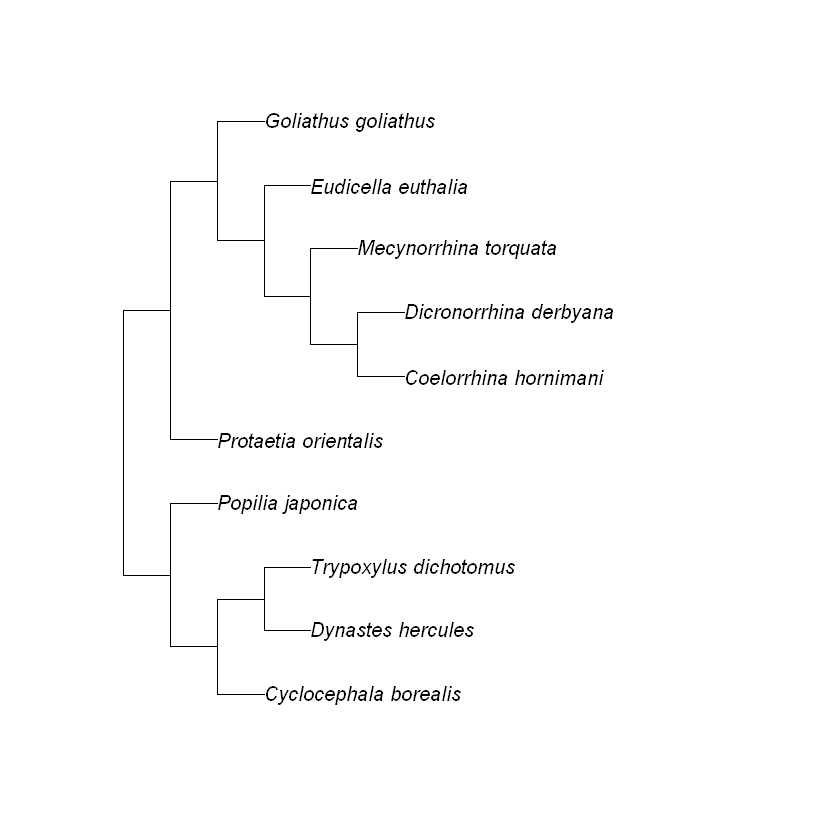

In [80]:
tree4 <- read.tree(text="(((Cyclocephala_borealis:1.0,(Dynastes_hercules:1.0,Trypoxylus_dichotomus:1.0):1.0):1.0,Popilia_japonica:1.0):1.0,(Protaetia_orientalis:1.0,((((Coelorrhina_hornimani:1.0,Dicronorrhina_derbyana:1):1,Mecynorrhina_torquata:1.0):1,Eudicella_euthalia:1.0):1,Goliathus_goliathus:1.0):1.0):1.0):1.0;")
#tree4 <-  drop.tip(tree4,c("Euphoria_fulgida"))
plot.phylo(tree4)

In [69]:
spir <- 'T'
tree <- tree4
digits <- 5
tips <- gsub("_", " ", tree$tip.label)
tree$tip.label <- tips
df_ave_sort = df_ave[df_ave['spiracle'] == spir,][match(tips, df_ave[df_ave['spiracle'] == spir,]$species),]
df_ave_sort$log_area_dist <- round(log10(df_ave_sort$area.mm.2/df_ave_sort$depth.mm), digits = digits)
df_ave_sort$log_area <- round(log10(df_ave_sort$area.mm.2), digits = digits)
df_ave_sort$log_mass <- round(log10(df_ave_sort$mass.g), digits = digits)
df_ave_sort

,species,spiracle,mass.g,area.mm.2,depth.mm,log_area_dist,log_area,log_mass
NA,NA,NA,NA,NA,NA,NA,NA,NA
74,Dynastes hercules,T,26.3500,0.741523838,1.0788964,-0.16285,-0.12987,1.42078
80,Trypoxylus dichotomus,T,6.4149,0.195184039,0.5859995,-0.47745,-0.70956,0.80719
78,Popilia japonica,T,0.1312,0.009278006,0.1749687,-1.27551,-2.03255,-0.88207
79,Protaetia orientalis,T,1.3750,0.064890325,0.3065776,-0.67436,-1.18782,0.13830
71,Coelorrhina hornimani,T,1.1300,0.093885056,0.4799060,-0.70856,-1.02740,0.05308
73,Dicronorrhina derbyana,T,2.1325,0.083087225,0.6190670,-0.87220,-1.08047,0.32889
77,Mecynorrhina torquata,T,6.9510,0.213193241,1.0063677,-0.67398,-0.67123,0.84205
75,Eudicella euthalia,T,2.1835,0.077483447,0.5905602,-0.88206,-1.11079,0.33915
76,Goliathus goliathus,T,18.1500,1.234093631,1.1683909,0.02376,0.09135,1.25888


In [70]:
comparative_data <- comparative.data(tree, df_ave_sort[nrow(df_ave_sort):1,], species)

ERROR: Error in `.rowNamesDF<-`(x, value = value): missing values in 'row.names' are not allowed


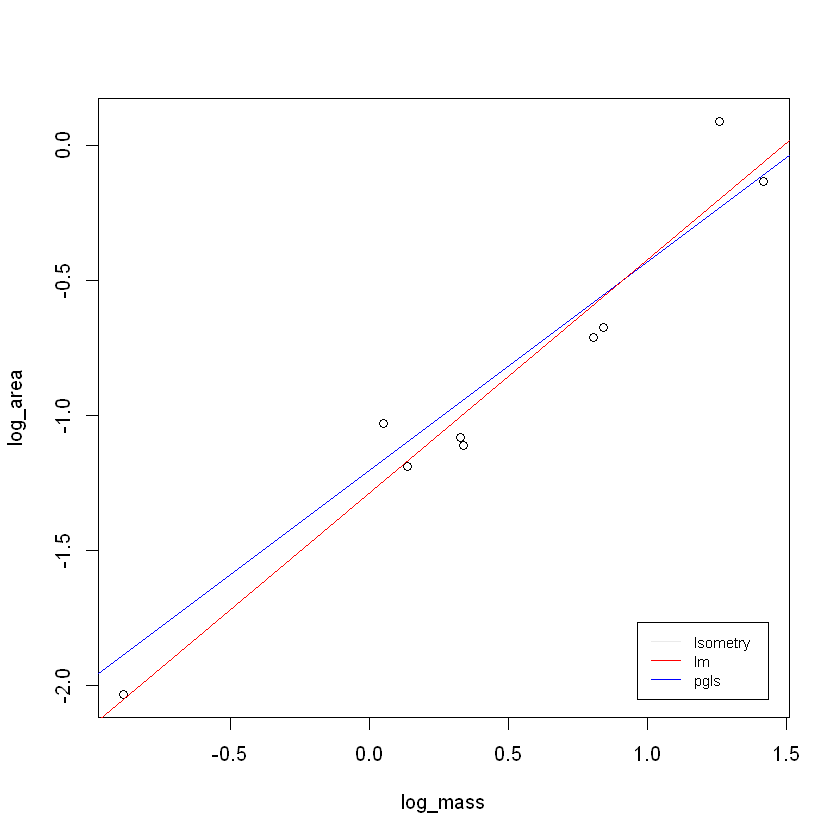

In [71]:
model1<-pgls(log_area~log_mass, comparative_data, lambda="ML")
model2<-lm(log_area~log_mass, df_ave_sort)
plot(log_area~log_mass, data=df_ave_sort)
abline(model1, col='blue')
abline(model2, col='red')
legend ("bottomright",legend=c("Isometry","lm", "pgls"),cex =0.75,lty=c(1,1,1),inset=0.03, seg.len = 2,
        col=c(rgb(red = 0.2,green = 0.2,blue = 0.2,alpha=0.1),
              'red',
              'blue'),
        bg="white")

In [34]:
panel_fig <- function(model1, model2, data, o, reg, slope, x, y){
    
  #pdf(paste("./plots/", paste(paste(o, reg, sep=""), "_regressions.pdf", sep = ""), sep = ""), width=10, height=4)
  png(paste("./plots/", paste(paste(o, reg, sep=""), "_regressions.png", sep = ""), sep = ""), width=1000, height=400)
  par(mfrow=c(1,2),mar = c(2,3,2,0))
  par(lwd=1)
  par(mar = c(3,3,2,1) + 0.1)
  
  
 plot(x, y,main=paste("Spiracle ", o, " Slopes"))
 for(ent in seq(-6,4,(max(y)-min(y))/20 )) {
   abline(coef =c(ent,slope), col=rgb(red = 0.2,green = 0.2,blue = 0.2,alpha=0.1))
 }
 abline(model1,col='blue')
 abline(model2,col='red')
 
 title(ylab=paste("log(", reg, ")"), line=2, cex.lab=1)
 title(xlab="log(mass)", line=2, cex.lab=1)
 
 par(font=2)
 #legend ("topleft", legend="d)",bty = "n")
 par(font=1)
 legend ("bottomright",legend=c("isometry","lm", "pgls"),cex =0.75,lty=c(1,1,1),inset=0.03, seg.len = 2,
         col=c(rgb(red = 0.2,green = 0.2,blue = 0.2,alpha=0.1),
               'red',
               'blue'),
         bg="white")
    
  profile_lambda=pgls.profile(model1, which="lambda") # vary lambda
  par(mar=c(7,4,2,2))
  plot(profile_lambda)

  dev.off()
}

prep_data <- function(spir, tree, digits, df_ave) {
    #spir <- 'S'
    #tree <- tree4
    #digits <- 5
    tips <- gsub("_", " ", tree$tip.label)
    tree$tip.label <- tips
    df_ave_sort = df_ave[df_ave['spiracle'] == spir,][match(tips, df_ave[df_ave['spiracle'] == spir,]$species),]
    df_ave_sort$log_area_dist <- round(log10(df_ave_sort$area.mm.2/df_ave_sort$depth.mm), digits = digits)
    df_ave_sort$log_area <- round(log10(df_ave_sort$area.mm.2), digits = digits)
    df_ave_sort$log_mass <- round(log10(df_ave_sort$mass.g), digits = digits)
    df_ave_sort$log_area_2_dist <- round(log10((df_ave_sort$area.mm.2^2)/df_ave_sort$depth.mm), digits = digits)
    return(df_ave_sort)
}

In [95]:
spir <- '5'
tree <- tree4
tips <- gsub("_", " ", tree$tip.label)
tree$tip.label <- tips
digits <- 4
df_con <- df_ave

for (spir in c('T', 'S', '1', '2', '3', '4', '5', '6')) {
    
    df_ave_sort <- prep_data(spir, tree, digits, df_ave)
    comparative_data <- comparative.data(tree, df_ave_sort[nrow(df_ave_sort):1,], species)

    model1<-pgls(log_area~log_mass, comparative_data, lambda="ML")
    model2<-lm(log_area~log_mass, df_ave_sort)
    
    model3<-pgls(log_area_dist~log_mass, comparative_data, lambda="ML")
    model4<-lm(log_area_dist~log_mass, df_ave_sort)
    
    model5<-pgls(log_area_2_dist~log_mass, comparative_data, lambda="ML")
    model6<-lm(log_area_2_dist~log_mass, df_ave_sort)

    panel_fig(model1, model2, df_ave_sort, spir, "_area", 0.67, df_ave_sort$log_mass, df_ave_sort$log_area)
    panel_fig(model3, model4, df_ave_sort, spir, "_area_over_dist", 0.33, df_ave_sort$log_mass, df_ave_sort$log_area_dist)
    panel_fig(model5, model6, df_ave_sort, spir, "_area_2_over_dist", 1.00, df_ave_sort$log_mass, df_ave_sort$log_area_2_dist)
    
}

---

## Plot for species averaged mass vs species averaged spiracle area (log transformed)

<img src="./plots/S_area_regressions.png" style="width:900px;"><img src="./plots/T_area_regressions.png" style="width:900px;"><img src="./plots/1_area_regressions.png" style="width:900px;"><img src="./plots/2_area_regressions.png" style="width:900px;"><img src="./plots/3_area_regressions.png" style="width:900px;"><img src="./plots/4_area_regressions.png" style="width:900px;"><img src="./plots/5_area_regressions.png" style="width:900px;"><img src="./plots/6_area_regressions.png" style="width:900px;">

---

## Species averaged mass vs $\frac{\mathrm{species\,averaged\,area}}{\mathrm{species\,averaged\,depth}}$ (log transformed)
<img src="./plots/S_area_over_dist_regressions.png" style="width:900px;"><img src="./plots/T_area_over_dist_regressions.png" style="width:900px;"><img src="./plots/1_area_over_dist_regressions.png" style="width:900px;"><img src="./plots/2_area_over_dist_regressions.png" style="width:900px;"><img src="./plots/3_area_over_dist_regressions.png" style="width:900px;"><img src="./plots/4_area_over_dist_regressions.png" style="width:900px;"><img src="./plots/5_area_over_dist_regressions.png" style="width:900px;"><img src="./plots/6_area_over_dist_regressions.png" style="width:900px;">

---

## Species averaged mass vs $\frac{(\mathrm{species\,averaged\,area})^2}{\mathrm{species\,averaged\,depth}}$ (log transformed)
<img src="./plots/S_area_2_over_dist_regressions.png" style="width:900px;"><img src="./plots/T_area_2_over_dist_regressions.png" style="width:900px;"><img src="./plots/1_area_2_over_dist_regressions.png" style="width:900px;"><img src="./plots/2_area_2_over_dist_regressions.png" style="width:900px;"><img src="./plots/3_area_2_over_dist_regressions.png" style="width:900px;"><img src="./plots/4_area_2_over_dist_regressions.png" style="width:900px;"><img src="./plots/5_area_2_over_dist_regressions.png" style="width:900px;"><img src="./plots/6_area_2_over_dist_regressions.png" style="width:900px;">

In [11]:
summary(model1)
summary(model2)
print('____________________________________________________________________________________________________')
summary(model3)
summary(model4)
print('____________________________________________________________________________________________________')
summary(model5)
summary(model6)


Call:
pgls(formula = log_area ~ log_mass, data = comparative_data, 
    lambda = "ML")

Residuals:
      Min        1Q    Median        3Q       Max 
-0.300504 -0.021424  0.001474  0.123706  0.228626 

Branch length transformations:

kappa  [Fix]  : 1.000
lambda [ ML]  : 0.542
   lower bound : 0.000, p = 0.1665
   upper bound : 1.000, p = 0.051971
   95.0% CI   : (NA, NA)
delta  [Fix]  : 1.000

Coefficients:
            Estimate Std. Error t value  Pr(>|t|)    
(Intercept) -1.61120    0.18171 -8.8670 2.067e-05 ***
log_mass     0.60503    0.11590  5.2201 0.0008025 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1626 on 8 degrees of freedom
Multiple R-squared: 0.773,	Adjusted R-squared: 0.7447 
F-statistic: 27.25 on 1 and 8 DF,  p-value: 0.0008025 


Call:
lm(formula = log_area ~ log_mass, data = df_ave_sort)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.51340 -0.22007  0.01801  0.08443  0.83674 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.5427     0.1361 -11.339  3.3e-06 ***
log_mass      0.6138     0.1642   3.738  0.00572 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3943 on 8 degrees of freedom
Multiple R-squared:  0.6359,	Adjusted R-squared:  0.5904 
F-statistic: 13.97 on 1 and 8 DF,  p-value: 0.00572


[1] "____________________________________________________________________________________________________"



Call:
pgls(formula = log_area_dist ~ log_mass, data = comparative_data, 
    lambda = "ML")

Residuals:
     Min       1Q   Median       3Q      Max 
-0.12350 -0.10161  0.01113  0.19425  0.27118 

Branch length transformations:

kappa  [Fix]  : 1.000
lambda [ ML]  : 0.714
   lower bound : 0.000, p = 0.081016
   upper bound : 1.000, p = 0.19952
   95.0% CI   : (NA, NA)
delta  [Fix]  : 1.000

Coefficients:
            Estimate Std. Error t value  Pr(>|t|)    
(Intercept) -1.24915    0.21423 -5.8309 0.0003911 ***
log_mass     0.19416    0.11727  1.6556 0.1363918    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1767 on 8 degrees of freedom
Multiple R-squared: 0.2552,	Adjusted R-squared: 0.1621 
F-statistic: 2.741 on 1 and 8 DF,  p-value: 0.1364 


Call:
lm(formula = log_area_dist ~ log_mass, data = df_ave_sort)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.53766 -0.25465  0.01122  0.20948  0.76226 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.1908     0.1413  -8.425    3e-05 ***
log_mass      0.2204     0.1706   1.292    0.232    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4096 on 8 degrees of freedom
Multiple R-squared:  0.1727,	Adjusted R-squared:  0.06924 
F-statistic: 1.669 on 1 and 8 DF,  p-value: 0.2324


[1] "____________________________________________________________________________________________________"



Call:
pgls(formula = log_area_2_dist ~ log_mass, data = comparative_data, 
    lambda = "ML")

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3430 -0.2628 -0.1611  0.1149  0.5810 

Branch length transformations:

kappa  [Fix]  : 1.000
lambda [ ML]  : 0.637
   lower bound : 0.000, p = 0.1017
   upper bound : 1.000, p = 0.098934
   95.0% CI   : (NA, NA)
delta  [Fix]  : 1.000

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.86282    0.38716 -7.3944 7.66e-05 ***
log_mass     0.79690    0.22695  3.5113 0.007947 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3306 on 8 degrees of freedom
Multiple R-squared: 0.6065,	Adjusted R-squared: 0.5573 
F-statistic: 12.33 on 1 and 8 DF,  p-value: 0.007947 


Call:
lm(formula = log_area_2_dist ~ log_mass, data = df_ave_sort)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.98832 -0.46857  0.04176  0.25969  1.59899 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.7335     0.2737  -9.985 8.58e-06 ***
log_mass      0.8341     0.3304   2.525   0.0355 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7934 on 8 degrees of freedom
Multiple R-squared:  0.4435,	Adjusted R-squared:  0.3739 
F-statistic: 6.375 on 1 and 8 DF,  p-value: 0.03553


In [12]:
prepData <- function(dataForPrep){

tree0 <- read.tree(text="(((Cyclocephala_borealis:1.0,(Dynastes_hercules:1.0,Trypolyxus_dichotomus:1.0):1.0):1.0,Popilia_japonica:1.0):1.0,((Euphoria_fulgida:1.0,Protaetia_orientalis:1.0):1.0,(((Coelorrhina_hornimani:1.0,Mecynorrhina_torquata:1.0):1.0,Eudicella_euthalia:1.0):1.0,Goliathus_goliathus:1.0):1.0):1.0):1.0;")
tree0 <- drop.tip(tree0,c("Euphoria_fulgida"))
#plot.phylo(tree0)

tree1 <- read.tree(text="(((Cyclocephala_borealis:1.0,(Dynastes_hercules:1.0,Trypolyxus_dichotomus:1.0):1.0):1.0,Popilia_japonica:1.0):1.0,((Euphoria_fulgida:1.0,Protaetia_orientalis:1.0):1.0,(((Coelorrhina_hornimani:1.0,Mecynorrhina_torquata:1.0):1.0,Eudicella_euthalia:1.0):1.0,(Goliathus_goliathus:1,Dicronorrhina_derbyana:1):1.0):1.0):1.0):1.0;")
tree1 <- drop.tip(tree1,c("Euphoria_fulgida"))
#plot.phylo(tree1)

tree2 <- read.tree(text="(((Cyclocephala_borealis:1.0,(Dynastes_hercules:1.0,Trypolyxus_dichotomus:1.0):1.0):1.0,Popilia_japonica:1.0):1.0,((Euphoria_fulgida:1.0,Protaetia_orientalis:1.0):1.0,(((Coelorrhina_hornimani:1.0,Mecynorrhina_torquata:1.0):1.0,(Dicronorrhina_derbyana:1,Eudicella_euthalia:1.0):1):1,Goliathus_goliathus:1.0):1.0):1.0):1.0;")
tree2 <- drop.tip(tree2,c("Euphoria_fulgida"))
#plot.phylo(tree2)

tree3 <- read.tree(text="(((Cyclocephala_borealis:1.0,(Dynastes_hercules:1.0,Trypolyxus_dichotomus:1.0):1.0):1.0,Popilia_japonica:1.0):1.0,((Euphoria_fulgida:1.0,Protaetia_orientalis:1.0):1.0,(((Coelorrhina_hornimani:1.0,(Dicronorrhina_derbyana:1.0,Mecynorrhina_torquata:1.0):1.0):1,Eudicella_euthalia:1.0):1,Goliathus_goliathus:1.0):1.0):1.0):1.0;")
tree3 <- drop.tip(tree3,c("Euphoria_fulgida"))
#plot.phylo(tree3)

tree4 <- read.tree(text="(((Cyclocephala_borealis:1.0,(Dynastes_hercules:1.0,Trypolyxus_dichotomus:1.0):1.0):1.0,Popilia_japonica:1.0):1.0,((Euphoria_fulgida:1.0,Protaetia_orientalis:1.0):1.0,((((Coelorrhina_hornimani:1.0,Dicronorrhina_derbyana:1):1,Mecynorrhina_torquata:1.0):1,Eudicella_euthalia:1.0):1,Goliathus_goliathus:1.0):1.0):1.0):1.0;")

tree4 <- drop.tip(tree4,c("Euphoria_fulgida"))
#plot.phylo(tree4)

tree5 <- read.tree(text="(((Cyclocephala_borealis:1.0,(Dynastes_hercules:1.0,Trypolyxus_dichotomus:1.0):1.0):1.0,Popilia_japonica:1.0):1.0,((Euphoria_fulgida:1.0,Protaetia_orientalis:1.0):1.0,((((Coelorrhina_hornimani:1.0,Mecynorrhina_torquata:1.0):1,Eudicella_euthalia:1.0):1,Goliathus_goliathus:1.0):1,Dicronorrhina_derbyana:1):1.0):1.0):1.0;")

tree5 <- drop.tip(tree5,c("Euphoria_fulgida"))
#plot.phylo(tree5)

tree6 <- read.tree(text="(((Cyclocephala_borealis:1.0,(Dynastes_hercules:1.0,Trypolyxus_dichotomus:1.0):1.0):1.0,Popilia_japonica:1.0):1.0,((Euphoria_fulgida:1.0,Protaetia_orientalis:1.0):1.0,((((Coelorrhina_hornimani:1.0,Mecynorrhina_torquata:1.0):1,Eudicella_euthalia:1.0):1,Dicronorrhina_derbyana:1):1,Goliathus_goliathus:1.0):1.0):1.0):1.0;")

tree6 <- drop.tip(tree6,c("Euphoria_fulgida"))
#plot.phylo(tree6)

tree7 <- read.tree(text="(((Cyclocephala_borealis:1.0,(Dynastes_hercules:1.0,Trypolyxus_dichotomus:1.0):1.0):1.0,Popilia_japonica:1.0):1.0,((Euphoria_fulgida:1.0,Protaetia_orientalis:1.0):1.0,((((Coelorrhina_hornimani:1.0,Mecynorrhina_torquata:1.0):1,Dicronorrhina_derbyana:1):1,Eudicella_euthalia:1.0):1,Goliathus_goliathus:1.0):1.0):1.0):1.0;")

tree7 <- drop.tip(tree7,c("Euphoria_fulgida"))
#plot.phylo(tree7)

data1 <- dataForPrep
i <- sapply(data1, is.factor)
data1[i] <- lapply(data1[i], as.character)


v1 <- data.frame(matrix(1,dim(data1)[1],dim(data1)[2]))
names(v1) <- names(data1)
#cyclocephala
v1[1,] <- data.frame(data1[10,])
#dynastes
v1[2,] <- data.frame(data1[9,])
#trypolyxus
v1[3,] <- data.frame(data1[8,])
#popillia
v1[4,] <- data.frame(data1[7,])
#protaetia
v1[5,] <- data.frame(data1[6,])
#coelorrhina
v1[6,] <- data.frame(data1[2,])
#mecynorrhina
v1[7,] <- data.frame(data1[4,])
#dicronorrhina
v1[10,] <- data.frame(data1[3,])
#eudicella
v1[8,] <- data.frame(data1[5,])
#goliathus
v1[9,] <- data.frame(data1[1,])


v2 <- data.frame(matrix(1,dim(data1)[1],dim(data1)[2]))
names(v2) <- names(data1)
#cyclocephala
v2[1,] <- data.frame(data1[10,])
#dynastes
v2[2,] <- data.frame(data1[9,])
#trypolyxus
v2[3,] <- data.frame(data1[8,])
#popillia
v2[4,] <- data.frame(data1[7,])
#protaetia
v2[5,] <- data.frame(data1[6,])
#coelorrhina
v2[6,] <- data.frame(data1[2,])
#mecynorrhina
v2[7,] <- data.frame(data1[4,])
#dicronorrhina
v2[8,] <- data.frame(data1[3,])
#eudicella
v2[9,] <- data.frame(data1[5,])
#goliathus
v2[10,] <- data.frame(data1[1,])


v3 <- data.frame(matrix(1,dim(data1)[1],dim(data1)[2]))
names(v3) <- names(data1)
#cyclocephala
v3[1,] <- data.frame(data1[10,])
#dynastes
v3[2,] <- data.frame(data1[9,])
#trypolyxus
v3[3,] <- data.frame(data1[8,])
#popillia
v3[4,] <- data.frame(data1[7,])
#protaetia
v3[5,] <- data.frame(data1[6,])
#coelorrhina
v3[6,] <- data.frame(data1[2,])
#mecynorrhina
v3[8,] <- data.frame(data1[4,])
#dicronorrhina
v3[7,] <- data.frame(data1[3,])
#eudicella
v3[9,] <- data.frame(data1[5,])
#goliathus
v3[10,] <- data.frame(data1[1,])


v4 <- data.frame(matrix(1,dim(data1)[1],dim(data1)[2]))
names(v4) <- names(data1)
#cyclocephala
v4[1,] <- data.frame(data1[10,])
#dynastes
v4[2,] <- data.frame(data1[9,])
#trypolyxus
v4[3,] <- data.frame(data1[8,])
#popillia
v4[4,] <- data.frame(data1[7,])
#protaetia
v4[5,] <- data.frame(data1[6,])
#coelorrhina
v4[6,] <- data.frame(data1[2,])
#mecynorrhina
v4[8,] <- data.frame(data1[4,])
#dicronorrhina
v4[7,] <- data.frame(data1[3,])
#eudicella
v4[9,] <- data.frame(data1[5,])
#goliathus
v4[10,] <- data.frame(data1[1,])


v5 <- data.frame(matrix(1,dim(data1)[1],dim(data1)[2]))
names(v5) <- names(data1)
#cyclocephala
v5[1,] <- data.frame(data1[10,])
#dynastes
v5[2,] <- data.frame(data1[9,])
#trypolyxus
v5[3,] <- data.frame(data1[8,])
#popillia
v5[4,] <- data.frame(data1[7,])
#protaetia
v5[5,] <- data.frame(data1[6,])
#coelorrhina
v5[6,] <- data.frame(data1[2,])
#mecynorrhina
v5[7,] <- data.frame(data1[4,])
#dicronorrhina
v5[10,] <- data.frame(data1[3,])
#eudicella
v5[8,] <- data.frame(data1[5,])
#goliathus
v5[9,] <- data.frame(data1[1,])


v6 <- data.frame(matrix(1,dim(data1)[1],dim(data1)[2]))
names(v6) <- names(data1)
#cyclocephala
v6[1,] <- data.frame(data1[10,])
#dynastes
v6[2,] <- data.frame(data1[9,])
#trypolyxus
v6[3,] <- data.frame(data1[8,])
#popillia
v6[4,] <- data.frame(data1[7,])
#protaetia
v6[5,] <- data.frame(data1[6,])
#coelorrhina
v6[6,] <- data.frame(data1[2,])
#mecynorrhina
v6[7,] <- data.frame(data1[4,])
#dicronorrhina
v6[9,] <- data.frame(data1[3,])
#eudicella
v6[8,] <- data.frame(data1[5,])
#goliathus
v6[10,] <- data.frame(data1[1,])


v7 <- data.frame(matrix(1,dim(data1)[1],dim(data1)[2]))
names(v7) <- names(data1)
#cyclocephala
v7[1,] <- data.frame(data1[10,])
#dynastes
v7[2,] <- data.frame(data1[9,])
#trypolyxus
v7[3,] <- data.frame(data1[8,])
#popillia
v7[4,] <- data.frame(data1[7,])
#protaetia
v7[5,] <- data.frame(data1[6,])
#coelorrhina
v7[6,] <- data.frame(data1[2,])
#mecynorrhina
v7[7,] <- data.frame(data1[4,])
#dicronorrhina
v7[8,] <- data.frame(data1[3,])
#eudicella
v7[9,] <- data.frame(data1[5,])
#goliathus
v7[10,] <- data.frame(data1[1,])

newList <- list("1" = v1, "2" = v2, "3" = v3,"4" = v4,"5" = v5,"6" = v6,"7" = v7)
return(newList)
}


In [13]:
install.packages("viridis")
install.packages("grImport")
install.packages("extrafontdb")
install.packages("Rttf2pt1")
install.packages("extrafont")

package 'viridis' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jwagne\AppData\Local\Temp\RtmpghqYxx\downloaded_packages
package 'grImport' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jwagne\AppData\Local\Temp\RtmpghqYxx\downloaded_packages
package 'extrafontdb' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jwagne\AppData\Local\Temp\RtmpghqYxx\downloaded_packages

  There is a binary version available but the source version is later:
         binary source needs_compilation
Rttf2pt1  1.3.8  1.3.9              TRUE

  Binaries will be installed
package 'Rttf2pt1' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jwagne\AppData\Local\Temp\RtmpghqYxx\downloaded_packages
package 'extrafont' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jwagne\AppData\Local\Temp\Rtmp

In [14]:
#various phylogenetic R packages that all have useful functions
#I cannot remember which is specific to the pgls code other than caper
library(ape)
library(phytools)
library(geiger)
library(nlme)
library(caper)
library(viridis)
library(lattice)
library(grImport)
library(extrafontdb)
library(Rttf2pt1)
library(extrafont)
library(extrafontdb)

####################### tTest Functions ##########################
ttestpGLS <- function(t, coefnum, val){
  co <- coef(summary(t))
  tstat <- (co[coefnum,1]-val)/co[coefnum,2]
  2 * pt(abs(tstat), t$n, lower.tail = FALSE)
}
ttestLM <- function(t, coefnum, val){
  co <- coef(summary(t))
  tstat <- (co[coefnum,1]-val)/co[coefnum,2]
  2 * pt(abs(tstat), t$df.residual, lower.tail = FALSE)
}
ttestpGLS2 <- function(t, coefnum, t2){
  co <- coef(summary(t))
  co2 <- coef(summary(t2))
  tstat <- (co[coefnum,1]-co2[coefnum,1])/sqrt((co[coefnum,2]^2)+(co2[coefnum,2]^2))
  2 * pt(abs(tstat), t$n, lower.tail = FALSE)
}
ttestLM2 <- function(t, coefnum, t2){
  co <- coef(summary(t))
  co2 <- coef(summary(t2))
  tstat <- (co[coefnum,1]-co2[coefnum,1])/sqrt((co[coefnum,2]^2)+(co2[coefnum,2]^2))
  2 * pt(abs(tstat), t$df.residual, lower.tail = FALSE)
}



makeModels <- function(prepDat, treePrep, testSlope){
  one <- data.frame(matrix(1,9,8))
  names(one) <- c("pGLS_p", "pGLS_slope", "pgls_R^2", "lm_p", "lm_slope", "lm_R^2","pgls_intercept", "lm_intercept")
  i <- 1
  
  #for online troubleshooting: http://blog.phytools.org
  ########################################################################
  #compose the tree
  
  #MAKE SURE THE SPECIES DATA ARE IN THE SAME ORDER AS THE SPECIES ARE FOUND ON THE TREE
  
  tree <- treePrep
  
  #plot tree
  #plot.phylo(tree)
  #is.rooted (tree)
  
  
  #load data from a csv file
  data1<-prepDat
  #data1
  
  #reads out variable names in data set to check that they're associated with the tree, and lets you check for extra rows in the data set (shown as N/As). These need to be deleted in the csv file if they exist. 
  #names(data1)
  
  #reads our species names to check that they're associated with the data (compare to previous line)
  #data1$species
  #tree$tip
  
  
  
  ########################################################################
  #creating a comparative dataframe
  #to my knowledge what this code is doing is creating a series of matrices, where the tree is converted to a matrix, and so is the data, with species names being the rows and columns, because this is how the PGLS works, it does matrix math. this associates all data with the names in the tree so data must be arranged in the same order on your csv file (by species)as in the tree. 
  
  slope <- testSlope
  
  comparative_data <- comparative.data(tree, data.frame(data1),"species")
  model1<-pgls(meso~mass, comparative_data ,lambda="ML")
  model2 <- lm(meso~mass, data1)
  #plot(meso~mass, data=data1)
  #abline(model1, col="red")
  #abline(model2, col="blue")
  
  one[i,1] <- ttestpGLS(model1, 2, slope)
  one[i,2] <- model1$model$coef[2]
  one[i,4] <- ttestLM(model2, 2, slope)
  one[i,5] <- model2$coefficients[2]
  #Meso
  #Corrected:
  one[i,3]<-summary(model1)$r.squared
  #Uncorrected:
  one[i,6]<-summary(model2)$r.squared
  
  one[i,7] <- model1$model$coef[1]
  one[i,8] <- model2$coefficients[1]
  i <- i+1
  
  comparative_data <- comparative.data(tree, data1,"species")
  model3<-pgls(meta~mass, comparative_data ,lambda="ML")
  model4 <- lm(meta~mass, data1)
  #plot(meta~mass, data=data1)
  #abline(model3, col="red")
  #abline(model4, col="blue")
  model3
  ttestpGLS(model3, 2, slope)
  model4
  ttestLM(model4, 2, slope)
  one[i,1] <- ttestpGLS(model3, 2, slope)
  one[i,2] <- model3$model$coef[2]
  one[i,4] <- ttestLM(model4, 2, slope)
  one[i,5] <- model4$coefficients[2]
  
  #Meta
  #Corrected:
  one[i,3]<-summary(model3)$r.squared
  #Uncorrected:
  one[i,6]<-summary(model4)$r.squared
  one[i,7] <- model3$model$coef[1]
  one[i,8] <- model4$coefficients[1]
  i <- i+1
  
  comparative_data <- comparative.data(tree, data1,"species")
  model5<-pgls(a1~mass, comparative_data ,lambda="ML")
  model6 <- lm(a1~mass, data1)
  #plot(a1~mass, data=data1)
  #abline(model5, col="red")
  #abline(model6, col="blue")
  model5
  ttestpGLS(model5, 2, slope)
  model6
  ttestLM(model6, 2, slope)
  one[i,1] <- ttestpGLS(model5, 2, slope)
  one[i,2] <- model5$model$coef[2]
  one[i,4] <- ttestLM(model6, 2, slope)
  one[i,5] <- model6$coefficients[2]
  
  #A1
  #Corrected:
  one[i,3]<-summary(model5)$r.squared
  #Uncorrected:
  one[i,6]<-summary(model6)$r.squared
  one[i,7] <- model5$model$coef[1]
  one[i,8] <- model6$coefficients[1]
  i <- i+1
  
  comparative_data <- comparative.data(tree, data1,"species")
  model7<-pgls(a2~mass, comparative_data ,lambda="ML")
  model8 <- lm(a2~mass, data1)
  #plot(a2~mass, data=data1)
  #abline(model7, col="red")
  #abline(model8, col="blue")
  #model7
  ttestpGLS(model7, 2, slope)
  model8
  ttestLM(model8, 2, slope)
  one[i,1] <- ttestpGLS(model7, 2, slope)
  one[i,2] <- model7$model$coef[2]
  one[i,4] <- ttestLM(model8, 2, slope)
  one[i,5] <- model8$coefficients[2]
  
  #A2
  #Corrected:
  one[i,3]<-summary(model7)$r.squared
  #Uncorrected:
  one[i,6]<-summary(model8)$r.squared
  one[i,7] <- model7$model$coef[1]
  one[i,8] <- model8$coefficients[1]
  i <- i+1
  
  comparative_data <- comparative.data(tree, data1,"species")
  model9<-pgls(a3~mass, comparative_data ,lambda="ML")
  #print(summary(model9))
  #print(comparative_data)
  #print(data.frame(data1))
  #plot.phylo(tree)
  
  #abline(model1, col='blue')
  model10 <- lm(a3~mass, data1)
  #plot(a3~mass, data=data1)
  #abline(model9, col="red")
  #abline(model10, col="blue")
  model9
  ttestpGLS(model9, 2, slope)
  model10
  ttestLM(model10, 2, slope)
  one[i,1] <- ttestpGLS(model9, 2, slope)
  one[i,2] <- model9$model$coef[2]
  one[i,4] <- ttestLM(model10, 2, slope)
  one[i,5] <- model10$coefficients[2]
  
  #A3
  #Corrected:
  one[i,3]<-summary(model9)$r.squared
  #Uncorrected:
  one[i,6]<-summary(model10)$r.squared
  one[i,7] <- model9$model$coef[1]
  one[i,8] <- model10$coefficients[1]
  i <- i+1
  
  comparative_data <- comparative.data(tree, data1,"species")
  model11<-pgls(a4~mass, comparative_data ,lambda="ML")
  model12 <- lm(a4~mass, data1)
  #plot(a4~mass, data=data1)
  #abline(model11, col="red")
  #abline(model12, col="blue")
  model11
  ttestpGLS(model11, 2, slope)
  model12
  ttestLM(model12, 2, slope)
  one[i,1] <- ttestpGLS(model11, 2, slope)
  one[i,2] <- model11$model$coef[2]
  one[i,4] <- ttestLM(model12, 2, slope)
  one[i,5] <- model12$coefficients[2]
  
  #
  #A4
  #Corrected:
  one[i,3]<-summary(model11)$r.squared
  #Uncorrected:
  one[i,6]<-summary(model12)$r.squared
  one[i,7] <- model11$model$coef[1]
  one[i,8] <- model12$coefficients[1]
  
  i <- i+1
  
  comparative_data <- comparative.data(tree, data1,"species")
  model13<-pgls(a5~mass, comparative_data ,lambda="ML")
  model14 <- lm(a5~mass, data1)
  #plot(a5~mass, data=data1)
  #abline(model13, col="red")
  #abline(model14, col="blue")
  model13
  ttestpGLS(model13, 2, slope)
  model14
  ttestLM(model14, 2, slope)
  one[i,1] <- ttestpGLS(model13, 2, slope)
  one[i,2] <- model13$model$coef[2]
  one[i,4] <- ttestLM(model14, 2, slope)
  one[i,5] <- model14$coefficients[2]
  #
  #A5
  #Corrected:
  one[i,3]<-summary(model13)$r.squared
  #Uncorrected:
  one[i,6]<-summary(model14)$r.squared
  one[i,7] <- model13$model$coef[1]
  one[i,8] <- model14$coefficients[1]
  i <- i+1
  
  comparative_data <- comparative.data(tree, data1,"species")
  model15<-pgls(a6~mass, comparative_data ,lambda="ML")
  model16 <- lm(a6~mass, data1)
  #plot(a6~mass, data=data1)
  #abline(model15, col="red")
  #abline(model16, col="blue")
  model15
  ttestpGLS(model15, 2, slope)
  model16
  ttestLM(model16, 2, slope)
  one[i,1] <- ttestpGLS(model15, 2, slope)
  one[i,2] <- model15$model$coef[2]
  one[i,4] <- ttestLM(model16, 2, slope)
  one[i,5] <- model16$coefficients[2]
  #
  #A6
  #Corrected:
  one[i,3]<-summary(model15)$r.squared
  #Uncorrected:
  one[i,6]<-summary(model16)$r.squared
  one[i,7] <- model15$model$coef[1]
  one[i,8] <- model16$coefficients[1]
  i <- i+1
  
  comparative_data <- comparative.data(tree, data1,"species")
  model17<-pgls(all~mass, comparative_data ,lambda="ML")
  model18 <- lm(all~mass, data1)
  #plot(all~mass, data=data1)
  #abline(model17, col="purple")
  #abline(model18, col="black")
  #model17
  ttestpGLS(model17, 2, slope)
  #model18
  ttestLM(model18, 2, slope)
  one[i,1] <- ttestpGLS(model17, 2, slope)
  one[i,2] <- model17$model$coef[2]
  one[i,4] <- ttestLM(model18, 2, slope)
  one[i,5] <- model18$coefficients[2]
  #
  #Average
  #Corrected:
  one[i,3]<-summary(model17)$r.squared
  #Uncorrected:
  one[i,6]<-summary(model18)$r.squared
  one[i,7] <- model17$model$coef[1]
  one[i,8] <- model18$coefficients[1]
  i <- i+1
  
  newList <- list("1" = model1,"2" = model2,"3" = model3,"4" = model4,"5" = model5,"6" = model6,"7" = model7,"8" = model8,"9" = model9,
                  "10" = model10,"11" = model11,"12" = model12,"13" = model13,"14" = model14,"15" = model15,"16" = model16,"17" = model17,
                  "18" = model18, "19" = one)
  return(newList)
}

Warning message:
"package 'viridis' was built under R version 3.6.3"Loading required package: viridisLite
Warning message:
"package 'viridisLite' was built under R version 3.6.3"
Attaching package: 'viridis'

The following object is masked from 'package:maps':

    unemp

Warning message:
"package 'lattice' was built under R version 3.6.3"Warning message:
"package 'grImport' was built under R version 3.6.3"Loading required package: grid
Loading required package: XML
Warning message:
"package 'XML' was built under R version 3.6.3"Warning message:
"package 'Rttf2pt1' was built under R version 3.6.2"Warning message:
"package 'extrafont' was built under R version 3.6.2"Registering fonts with R


In [15]:
o <- 0

In [16]:
all_sp_area <- read.csv("./all_sp_area.csv", header=TRUE)
all_sp_area_d <- read.csv("./all_sp_area_d.csv", header=TRUE)
all_sp_area_2_d <- read.csv("./all_sp_area_2_d.csv", header=TRUE)

In [17]:
all_sp_area
all_sp_area_d
all_sp_area_2_d

species,mass,a6,a5,a4,a3,a2,a1,meta,meso,all
Goliathus_goliathus,1.23590703,-0.6889279,-0.6668549,-0.5340240,-0.6308597,-0.2428315,0.09600827,0.09134811,0.3395003,0.791328069
Coelorrhina_hornimani,0.05307844,-0.6733952,-0.9239227,-0.9371417,-0.9718624,-1.0746508,-0.86855107,-1.02740353,-0.6257440,0.042856739
Dicronorrhina_derbyana,0.32888904,-1.3505062,-1.4352502,-1.3438177,-1.2230948,-1.1087150,-1.07078254,-1.08046575,-0.4837370,-0.118811238
Mecynorrhina_torquata,0.83727270,-0.9741493,-1.1782477,-1.3881956,-0.9291042,-0.7355951,-0.37100265,-0.67122657,0.1521222,0.410470276
Eudicella_euthalia,0.33915320,-1.0944879,-1.2588810,-1.3293818,-1.1107029,-0.7457120,-1.02190827,-1.11079107,-0.3075584,0.043196813
Protaetia_orientalis,0.13830270,-1.4122002,-1.4335134,-1.4096855,-1.2123899,-1.2403225,-1.00140701,-1.18782005,-0.6207311,-0.195612545
Popilia_japonica,-0.88206617,-2.2281604,-2.5106555,-2.5629410,-2.2683360,-2.4997380,-2.14913923,-2.03254533,-1.4408093,-1.137263254
Trypoxylus_dichotomus,0.80617997,-1.5606759,-1.2646285,-1.4112527,-1.0052642,-0.9035481,-0.93631419,-0.70955570,-0.4527183,0.003419311
Dynastes_hercules,1.42078062,-0.9160914,-0.8690085,-0.9024496,-0.3817189,-0.1519520,-0.12356654,-0.12987488,0.1368443,0.640082100
Cyclocephala_borealis,-0.96778430,-2.4938295,-2.4925339,-2.3927998,-1.6001920,-1.5396144,-1.57695505,-1.61823821,-1.3494962,-0.796587008


species,mass,a6,a5,a4,a3,a2,a1,meta,meso,all
Goliathus_goliathus,1.23590703,-1.0149584,-0.8512838,-0.7772447,-0.7081482,-0.2769265,-0.00045541,0.02375995,0.36201968,-0.16386981
Coelorrhina_hornimani,0.05307844,-0.4167741,-0.6287173,-0.6197903,-0.4843387,-0.7292211,-0.48839228,-0.70855971,-0.11326696,-0.47765724
Dicronorrhina_derbyana,0.32888904,-1.0370383,-1.1601426,-1.0681654,-0.8818827,-0.7553722,-0.76139735,-0.87054010,0.05037617,-0.60548308
Mecynorrhina_torquata,0.83727270,-0.7824126,-1.1811743,-1.0658679,-0.6890211,-0.5166918,-0.36459786,-0.67398324,0.36914174,-0.32226073
Eudicella_euthalia,0.33915320,-0.8980594,-0.9923862,-1.0535726,-0.8323948,-0.4199479,-0.65872127,-0.87931764,0.16908546,-0.47635048
Protaetia_orientalis,0.13830270,-0.9901367,-0.9369974,-0.8966414,-0.5341976,-0.6189297,-0.30703348,-0.67689146,-0.08152191,-0.52108075
Popilia_japonica,-0.88206617,-1.4493997,-1.6749212,-1.7398422,-1.5837665,-1.8275513,-1.50392470,-1.27601465,-0.62493995,-1.26231443
Trypoxylus_dichotomus,0.80617997,-1.4878629,-1.3020681,-1.3802626,-0.8880784,-0.7077718,-0.67691091,-0.47745296,-0.04027995,-0.62333911
Dynastes_hercules,1.42078062,-1.1870070,-1.1021901,-1.1656605,-0.3152544,-0.0932937,-0.08851150,-0.17496050,0.52936384,-0.09892205
Cyclocephala_borealis,-0.96778430,-1.9418929,-1.8900585,-1.7910724,-0.9280982,-0.8419861,-0.88289660,-0.90946452,-0.60302924,-0.99678133


species,mass,a6,a5,a4,a3,a2,a1,meta,meso,all
Goliathus_goliathus,1.23590703,-1.685012,-1.459019,-1.224772,-1.2403766,-0.4857119,0.09885457,0.1151081,0.71143656,0.01093611
Coelorrhina_hornimani,0.05307844,-1.090169,-1.552640,-1.556932,-1.4562011,-1.8038719,-1.35694335,-1.7359632,-0.73901093,-1.26720396
Dicronorrhina_derbyana,0.32888904,-2.383086,-2.582261,-2.412004,-2.0748661,-1.8226977,-1.77226324,-1.8136242,-0.42580307,-1.25817557
Mecynorrhina_torquata,0.83727270,-1.756562,-2.359422,-2.454064,-1.6181253,-1.2522869,-0.73560051,-1.3452098,0.52126396,-0.34015721
Eudicella_euthalia,0.33915320,-1.899889,-2.143495,-2.244660,-1.8663181,-1.1588618,-1.62586766,-1.9780408,-0.07268877,-0.90810860
Protaetia_orientalis,0.13830270,-2.400120,-2.361999,-2.232851,-1.6851702,-1.8594073,-1.30999070,-1.8505476,-0.70205593,-1.41128887
Popilia_japonica,-0.88206617,-3.659901,-4.043296,-4.232369,-3.8523457,-4.2613275,-3.62965924,-3.3062602,-2.00167845,-2.85181284
Trypoxylus_dichotomus,0.80617997,-3.048539,-2.566697,-2.791515,-1.8933426,-1.6113198,-1.61322510,-1.1870087,-0.49299826,-1.24677774
Dynastes_hercules,1.42078062,-2.104720,-1.972795,-2.070753,-0.6853153,-0.1782659,-0.20755724,-0.1882151,0.66500782,-0.07128385
Cyclocephala_borealis,-0.96778430,-4.435037,-4.380071,-4.171309,-2.4551201,-2.3145186,-2.42201005,-2.4607333,-1.95252544,-2.47333063


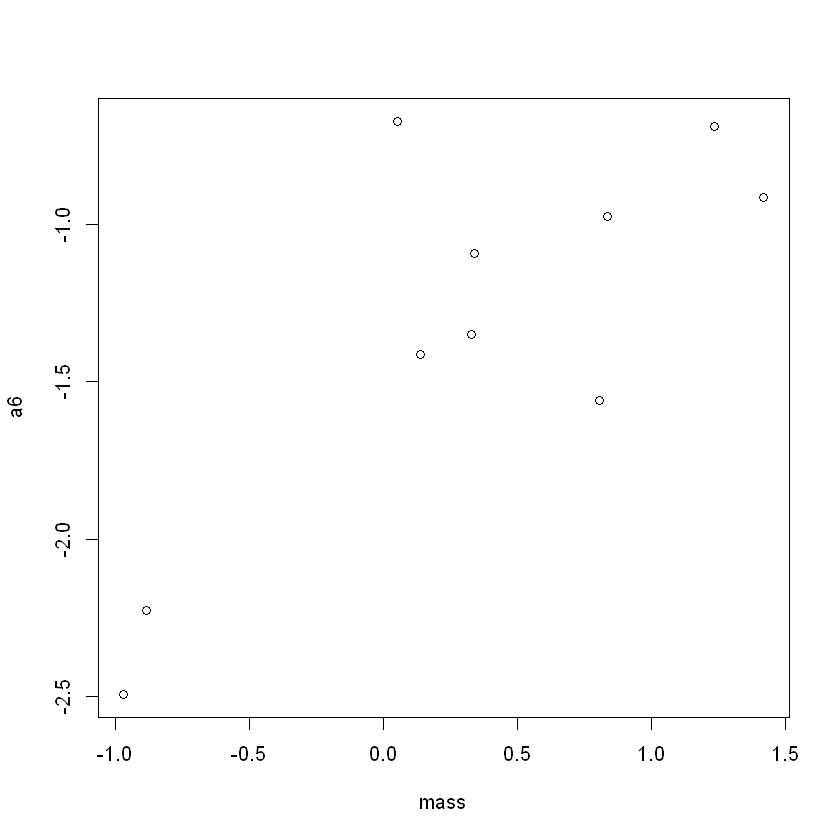

In [18]:
plot(a6~mass, data=all_sp_area)

In [19]:
par(family="Franklin Gothic Demi")
#proc royal size pdf(paste("/Users/jwagner/Desktop/plot dump r/", paste(o, ".pdf", sep = ""), sep = ""), width=7.086614173, height=4) #prepare A3 width size pdf
#pdf(paste("/c/Users/jwagne/Desktop/plot_dump/", paste(o, ".pdf", sep = ""), sep = ""), width=7.007874, height=4, family="Franklin Gothic Demi") #prepare A3 width size pdf
pdf(paste("~/Desktop/plot_dump/", paste(o, ".pdf", sep = ""), sep = ""), width=7.007874, height=4)

par(mfrow=c(2,3),mar = c(2,3,2,0) + 0.1) #split the plot area into a 2 by 3 grid 


#constants
digs <- 5 #number of digits to round the data. Needed because the pGLS does not converge for double with too many digits
multForCI <- 1.96 #multiple to get from standard error to 95% confidence interval

viridisPal <- viridis(1000)

In [20]:
spec <- all_sp_area$species; all_sp_area$species <- 0
r <- round(all_sp_area, digits = digs); all_sp_area$species <- spec
r$species <- spec; allSets <- prepData(r)


v4 <- allSets$'4'
v4
all_sp_area

species,mass,a6,a5,a4,a3,a2,a1,meta,meso,all
Cyclocephala_borealis,-0.96778,-2.49383,-2.49253,-2.39280,-1.60019,-1.53961,-1.57696,-1.61824,-1.34950,-0.79659
Dynastes_hercules,1.42078,-0.91609,-0.86901,-0.90245,-0.38172,-0.15195,-0.12357,-0.12987,0.13684,0.64008
Trypoxylus_dichotomus,0.80618,-1.56068,-1.26463,-1.41125,-1.00526,-0.90355,-0.93631,-0.70956,-0.45272,0.00342
Popilia_japonica,-0.88207,-2.22816,-2.51066,-2.56294,-2.26834,-2.49974,-2.14914,-2.03255,-1.44081,-1.13726
Protaetia_orientalis,0.13830,-1.41220,-1.43351,-1.40969,-1.21239,-1.24032,-1.00141,-1.18782,-0.62073,-0.19561
Coelorrhina_hornimani,0.05308,-0.67340,-0.92392,-0.93714,-0.97186,-1.07465,-0.86855,-1.02740,-0.62574,0.04286
Dicronorrhina_derbyana,0.32889,-1.35051,-1.43525,-1.34382,-1.22309,-1.10872,-1.07078,-1.08047,-0.48374,-0.11881
Mecynorrhina_torquata,0.83727,-0.97415,-1.17825,-1.38820,-0.92910,-0.73560,-0.37100,-0.67123,0.15212,0.41047
Eudicella_euthalia,0.33915,-1.09449,-1.25888,-1.32938,-1.11070,-0.74571,-1.02191,-1.11079,-0.30756,0.04320
Goliathus_goliathus,1.23591,-0.68893,-0.66685,-0.53402,-0.63086,-0.24283,0.09601,0.09135,0.33950,0.79133


species,mass,a6,a5,a4,a3,a2,a1,meta,meso,all
Goliathus_goliathus,1.23590703,-0.6889279,-0.6668549,-0.5340240,-0.6308597,-0.2428315,0.09600827,0.09134811,0.3395003,0.791328069
Coelorrhina_hornimani,0.05307844,-0.6733952,-0.9239227,-0.9371417,-0.9718624,-1.0746508,-0.86855107,-1.02740353,-0.6257440,0.042856739
Dicronorrhina_derbyana,0.32888904,-1.3505062,-1.4352502,-1.3438177,-1.2230948,-1.1087150,-1.07078254,-1.08046575,-0.4837370,-0.118811238
Mecynorrhina_torquata,0.83727270,-0.9741493,-1.1782477,-1.3881956,-0.9291042,-0.7355951,-0.37100265,-0.67122657,0.1521222,0.410470276
Eudicella_euthalia,0.33915320,-1.0944879,-1.2588810,-1.3293818,-1.1107029,-0.7457120,-1.02190827,-1.11079107,-0.3075584,0.043196813
Protaetia_orientalis,0.13830270,-1.4122002,-1.4335134,-1.4096855,-1.2123899,-1.2403225,-1.00140701,-1.18782005,-0.6207311,-0.195612545
Popilia_japonica,-0.88206617,-2.2281604,-2.5106555,-2.5629410,-2.2683360,-2.4997380,-2.14913923,-2.03254533,-1.4408093,-1.137263254
Trypoxylus_dichotomus,0.80617997,-1.5606759,-1.2646285,-1.4112527,-1.0052642,-0.9035481,-0.93631419,-0.70955570,-0.4527183,0.003419311
Dynastes_hercules,1.42078062,-0.9160914,-0.8690085,-0.9024496,-0.3817189,-0.1519520,-0.12356654,-0.12987488,0.1368443,0.640082100
Cyclocephala_borealis,-0.96778430,-2.4938295,-2.4925339,-2.3927998,-1.6001920,-1.5396144,-1.57695505,-1.61823821,-1.3494962,-0.796587008


In [114]:
model1$sterr

(Intercept)    log_mass 
  0.1817088   0.1159045

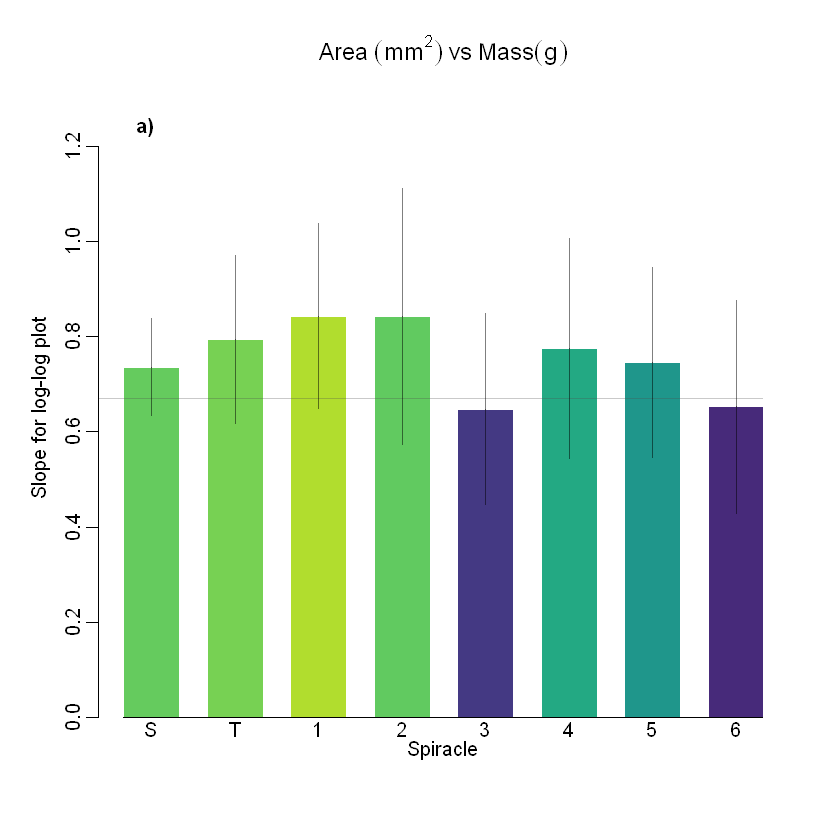

In [44]:
###############################################################################
######################## Plot of Area v Mass (panel a) ########################
###############################################################################

#round data as needed for pGLS
spec <- all_sp_area$species; all_sp_area$species <- 0
r <- round(all_sp_area, digits = digs); all_sp_area$species <- spec
r$species <- spec; allSets <- prepData(r)


v4 <- allSets$'4'
sumModel <- makeModels(v4,tree4,0.67)
model1 <- sumModel$'1'; model3 <- sumModel$'3'; model5 <- sumModel$'5';
model7 <- sumModel$'7'; model9 <- sumModel$'9'; model11 <- sumModel$'11';
model13 <- sumModel$'13'; model15 <- sumModel$'15'; model17 <- sumModel$'17';
one <- sumModel$'19'

barHeight <- c( model1$model$coef[2],model3$model$coef[2],model5$model$coef[2],model7$model$coef[2],
                model9$model$coef[2],model11$model$coef[2],model13$model$coef[2],model15$model$coef[2])                      
errorHeight <- c( model1$model$coef[2] + multForCI*model1$sterr[2],model3$model$coef[2] + multForCI*model3$sterr[2],
                  model5$model$coef[2] + multForCI*model5$sterr[2],model7$model$coef[2] + multForCI*model7$sterr[2],
                  model9$model$coef[2] + multForCI*model9$sterr[2],model11$model$coef[2] + multForCI*model11$sterr[2],
                  model13$model$coef[2] + multForCI*model13$sterr[2],model15$model$coef[2] + multForCI*model15$sterr[2])

# Grouped Bar Plot

par(lwd = 1)

virPrec <- 1000

arrowCol <- rgb(red = 0,green = 0,blue = 0, alpha = 0.5)
#-log(min(one$pGLS_p),base=10)

barx <- barplot(rbind(one$pGLS_slope[1:8]), main=expression(Area ~ (mm^{2}) ~ vs ~ Mass (g)),axes = FALSE,width = 1,space = c(0,0.5),
                col=c(viridisPal[1000-round(one$pGLS_p[1:8],digits=3)*1000]),
                beside=TRUE, ylim=c(0,1.3),border=FALSE)#,
                #xlim=c(-0.1,12.5))
par(font=2)
legend ("topleft", legend="a)",bty = "n")

isoCol <- rgb(red = 0.3,green = 0.3,blue = 0.3, alpha=0.3)
lines(c(0,12),c(0.67,0.67),col=isoCol,lty=1,lend="butt")
par(font=1)
axis(side=2,labels = FALSE); axis(side=2,labels = TRUE, tick = FALSE,line=-0.4) #y axis
axis(side=1, tck =-0.05,at = barx,line = -1, tick =FALSE, #x axis
     labels = c("S","T", "1","2","3","4","5","6"))
axis(side=1, tck=0, at=c(0.5,12),labels = FALSE, lend = "butt") #x axis
title(ylab="Slope for log-log plot", line=2, cex.lab=1)
title(xlab="Spiracle", line=0.8, cex.lab=1)
topWidth <- 0.07
arrows(barx, barHeight, barx,errorHeight, length=topWidth, angle=90, code=0, #error bars (95% CI)
       col = arrowCol,lwd=1, lend="square")
arrows(barx, barHeight, barx,barHeight-(errorHeight-barHeight), length=topWidth, angle=90, code=0, #error bars (95% CI)
       col = arrowCol,lwd=1, lend="square")


# k <- 1
# note <-1
# while (k < 12) {
#   text(x=k+0.15,y=0.03,labels = round((one$'pgls_R^2')[note],digits=2),pos=3,srt=90,cex = 0.75)
#   k<- k+1.5
#   note <- note+1
# }

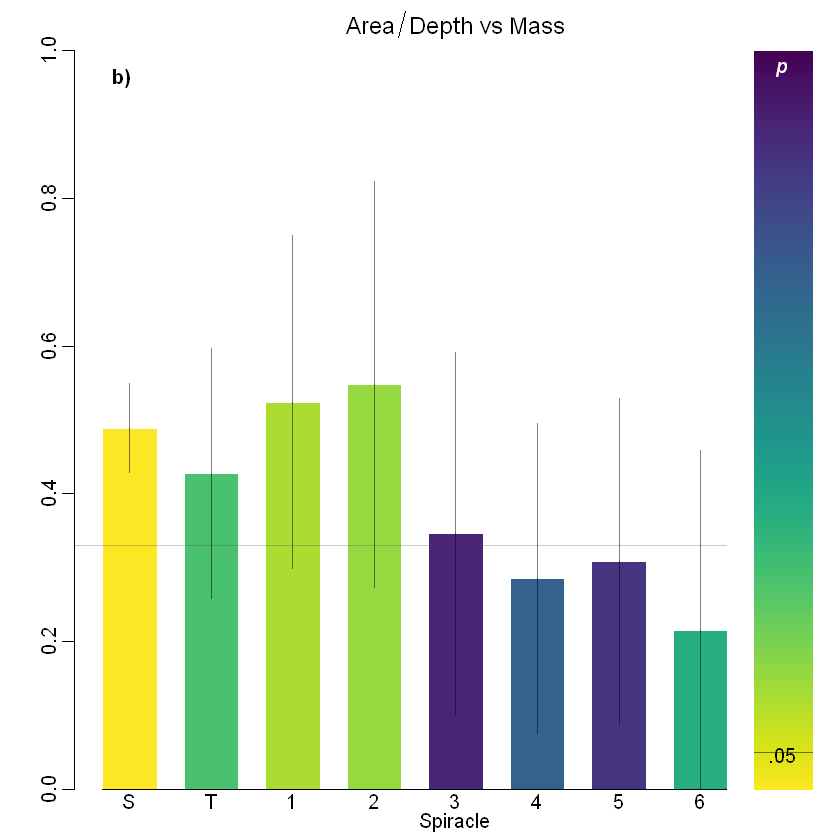

In [45]:
###############################################################################
##################### Plot of Area/Depth v Mass (panel b) #####################
###############################################################################

par(mar = c(2,3,2,0) + 0.1)

spec <- all_sp_area_d$species; all_sp_area_d$species <- 0; r <- round(all_sp_area_d, digits = digs)
all_sp_area_d$species <- spec; r$species <- spec; allSets <- prepData(r)

v4 <- allSets$'4';
v4 <- data.frame(v4)
sumModel <- makeModels(prepDat = v4,treePrep = tree4,testSlope = 0.33)

model1 <- sumModel$'1'; model3 <- sumModel$'3'; model5 <- sumModel$'5';
model7 <- sumModel$'7'; model9 <- sumModel$'9'; model11 <- sumModel$'11';
model13 <- sumModel$'13'; model15 <- sumModel$'15'; model17 <- sumModel$'17';
one <- sumModel$'19'

barHeight <- c( model1$model$coef[2],model3$model$coef[2],model5$model$coef[2],model7$model$coef[2],
                model9$model$coef[2],model11$model$coef[2],model13$model$coef[2],model15$model$coef[2])                      
errorHeight <- c( model1$model$coef[2] + multForCI*model1$sterr[2],model3$model$coef[2] + multForCI*model3$sterr[2],
                  model5$model$coef[2] + multForCI*model5$sterr[2],model7$model$coef[2] + multForCI*model7$sterr[2],
                  model9$model$coef[2] + multForCI*model9$sterr[2],model11$model$coef[2] + multForCI*model11$sterr[2],
                  model13$model$coef[2] + multForCI*model13$sterr[2],model15$model$coef[2] + multForCI*model15$sterr[2])

# Grouped Bar Plot

par(lwd = 1)

virPrec <- 1000

arrowCol <- rgb(red = 0,green = 0,blue = 0, alpha = 0.5)

#-log(min(one$pGLS_p),base=10)

barx <- barplot(rbind(one$pGLS_slope[1:8]), main=expression(Area/Depth ~ vs ~ Mass),axes = FALSE,width = 1,space = c(0,0.5),
                col=c(viridisPal[1000-round(one$pGLS_p[1:8],digits=3)*1000]),
                beside=TRUE, ylim=c(0,1),border=FALSE, xlim=c(0.5,13.5))#,
#xlim=c(-0.1,12.5))
par(font=2)
isoCol <- rgb(red = 0.3,green = 0.3,blue = 0.3, alpha=0.3)
lines(c(0,12),c(0.33,0.33),col=isoCol,lty=1,lend="butt")

topWidth <- 0.07
arrows(barx, barHeight, barx,errorHeight, length=topWidth, angle=90, code=0, #error bars (95% CI)
       col = arrowCol,lwd=1, lend="square")
arrows(barx, barHeight, barx,barHeight-(errorHeight-barHeight), length=topWidth, angle=90, code=0, #error bars (95% CI)
       col = arrowCol,lwd=1, lend="square")

legend ("topleft", legend="b)",bty = "n")
par(font=1)
axis(side=2,labels = FALSE)
axis(side=2,labels = TRUE, tick = FALSE,line=-0.4)
axis(side=1, tck =-0.05,at = barx,line = -1, tick =FALSE,
     labels = c("S","T", "1","2","3","4","5","6") )
axis(side=1, tck=0, at=c(0.5,12),labels = FALSE,lend="butt")
#title(ylab="slope log(area) vs log(mass)", line=2, cex.lab=1)
title(xlab="Spiracle", line=0.8, cex.lab=1)

yRan <- seq(0,1,0.001)
i <- 1
y <- 0
while (i < (length(yRan))) {
  segments(x0=12.5,x1=13.55,y1=yRan[i], y0=yRan[i], col = viridisPal[1000-i],lend="square", lwd = 1.1)
  i <- i+1
  y<-y+0.001
}
segments(x0=12.5,x1=13.55,y1=0.05, y0=0.05,lend="square", lwd = 0.75,col=arrowCol)

text(x=13,y=1,labels = expression(italic("p")),pos=1,cex=1,col="white")
text(x=13,y=.02,labels = expression(".05"),pos=3,cex=1,col=rgb(red = 0,green = 0,blue = 0, alpha=1),srt=0)

#segments(x0=12.5,x1=13.55,y1=0.5, y0=0.5,lend="square", lwd = 0.75,col=rgb(red = 0,green = 0,blue = 0, alpha=1))
#text(x=13,y=.48,labels = expression(".50"),pos=3,cex=1,col=rgb(red = 0,green = 0,blue = 0, alpha=1))

# k <- 1
# note <-1
# while (k < 12) {
#   text(x=k+0.15,y=0.03,labels = round((one$'pgls_R^2')[note],digits=2),pos=3,srt=90,cex = 0.75)
#   k<- k+1.5
#   note <- note+1
# }

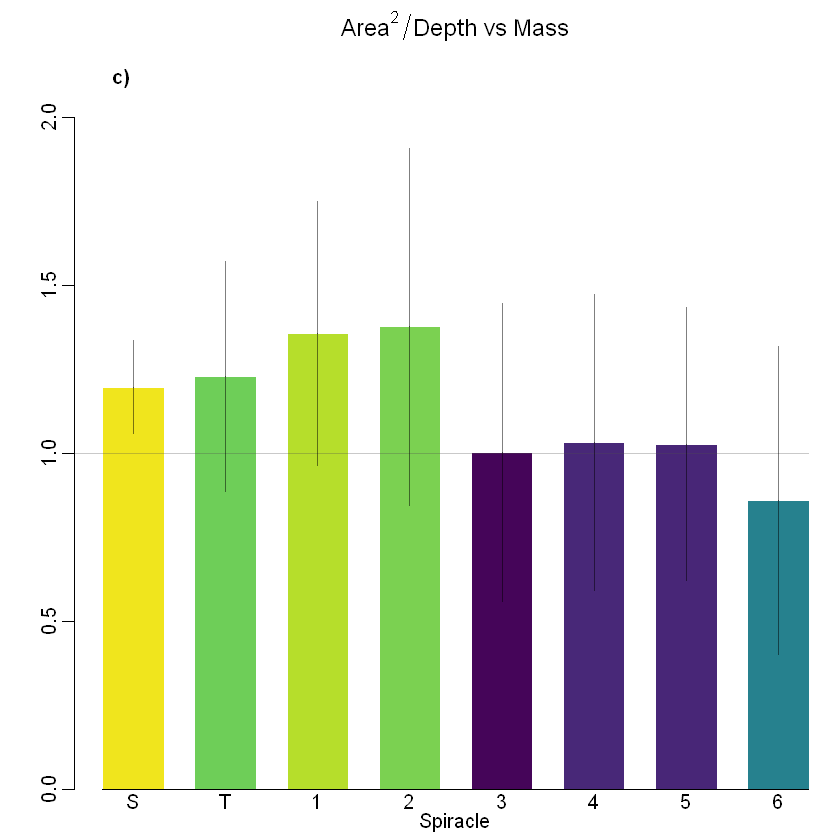

In [47]:
###############################################################################
#################### Plot of Area^2/Depth v Mass (panel c) ####################
###############################################################################
par(mar = c(2,3,2,0) + 0.1)

spec <- all_sp_area_2_d$species; all_sp_area_2_d$species <- 0; r <- round(all_sp_area_2_d, digits = digs)
all_sp_area_2_d$species <- spec; r$species <- spec

allSets <- prepData(r); v4 <- allSets$'4'; sumModel <- makeModels(v4,tree4,1)

model1 <- sumModel$'1'; model3 <- sumModel$'3'; model5 <- sumModel$'5';
model7 <- sumModel$'7'; model9 <- sumModel$'9'; model11 <- sumModel$'11';
model13 <- sumModel$'13'; model15 <- sumModel$'15'; model17 <- sumModel$'17';
one <- sumModel$'19'

barHeight <- c( model1$model$coef[2],model3$model$coef[2],model5$model$coef[2],model7$model$coef[2],
                model9$model$coef[2],model11$model$coef[2],model13$model$coef[2],model15$model$coef[2])                      
errorHeight <- c( model1$model$coef[2] + multForCI*model1$sterr[2],model3$model$coef[2] + multForCI*model3$sterr[2],
                  model5$model$coef[2] + multForCI*model5$sterr[2],model7$model$coef[2] + multForCI*model7$sterr[2],
                  model9$model$coef[2] + multForCI*model9$sterr[2],model11$model$coef[2] + multForCI*model11$sterr[2],
                  model13$model$coef[2] + multForCI*model13$sterr[2],model15$model$coef[2] + multForCI*model15$sterr[2])

# Grouped Bar Plot

par(lwd = 1)

virPrec <- 1000

arrowCol <- rgb(red = 0,green = 0,blue = 0, alpha = 0.5)

#-log(min(one$pGLS_p),base=10)

barx <- barplot(rbind(one$pGLS_slope[1:8]), main=expression(Area^{2}/Depth ~ vs ~ Mass),axes = FALSE,width = 1,space = c(0,0.5),
                col=c(viridisPal[1000-round(one$pGLS_p[1:8],digits=3)*1000]),
                beside=TRUE, ylim=c(0,2.2),border=FALSE)#,

isoCol <- rgb(red = 0.3,green = 0.3,blue = 0.3, alpha=0.3)
lines(c(0,12),c(1,1),col=isoCol,lty=1,lend="butt")
topWidth <- 0.07
arrows(barx, barHeight, barx,errorHeight, length=topWidth, angle=90, code=0, #error bars (95% CI)
       col = arrowCol,lwd=1, lend="square")
arrows(barx, barHeight, barx,barHeight-(errorHeight-barHeight), length=topWidth, angle=90, code=0, #error bars (95% CI)
       col = arrowCol,lwd=1, lend="square")

par(font=2)
legend ("topleft", legend="c)",bty = "n")
par(font=1)
axis(side=2,labels = FALSE)
axis(side=2,labels = TRUE, tick = FALSE,line=-0.4)
axis(side=1, tck =-0.05,at = barx,line = -1, tick =FALSE,
     labels = c("S","T", "1","2","3","4","5","6"))
axis(side=1, tck=0, at=c(0.5,12),labels = FALSE,lend="butt")
title(xlab="Spiracle", line=0.8, cex.lab=1)


# k <- 1
# note <-1
# while (k < 12) {
#   text(x=k+0.15,y=0.05,labels = round((one$'pgls_R^2')[note],digits=2),pos=3,srt=90,cex = 0.75)
#   k<- k+1.5
#   note <- note+1
# }

In [48]:
v4

species,mass,a6,a5,a4,a3,a2,a1,meta,meso,all
Cyclocephala_borealis,-0.96778,-4.43504,-4.38007,-4.17131,-2.45512,-2.31452,-2.42201,-2.46073,-1.95253,-2.47333
Dynastes_hercules,1.42078,-2.10472,-1.97280,-2.07075,-0.68532,-0.17827,-0.20756,-0.18822,0.66501,-0.07128
Trypoxylus_dichotomus,0.80618,-3.04854,-2.56670,-2.79152,-1.89334,-1.61132,-1.61323,-1.18701,-0.49300,-1.24678
Popilia_japonica,-0.88207,-3.65990,-4.04330,-4.23237,-3.85235,-4.26133,-3.62966,-3.30626,-2.00168,-2.85181
Protaetia_orientalis,0.13830,-2.40012,-2.36200,-2.23285,-1.68517,-1.85941,-1.30999,-1.85055,-0.70206,-1.41129
Coelorrhina_hornimani,0.05308,-1.09017,-1.55264,-1.55693,-1.45620,-1.80387,-1.35694,-1.73596,-0.73901,-1.26720
Dicronorrhina_derbyana,0.32889,-2.38309,-2.58226,-2.41200,-2.07487,-1.82270,-1.77226,-1.81362,-0.42580,-1.25818
Mecynorrhina_torquata,0.83727,-1.75656,-2.35942,-2.45406,-1.61813,-1.25229,-0.73560,-1.34521,0.52126,-0.34016
Eudicella_euthalia,0.33915,-1.89989,-2.14349,-2.24466,-1.86632,-1.15886,-1.62587,-1.97804,-0.07269,-0.90811
Goliathus_goliathus,1.23591,-1.68501,-1.45902,-1.22477,-1.24038,-0.48571,0.09885,0.11511,0.71144,0.01094


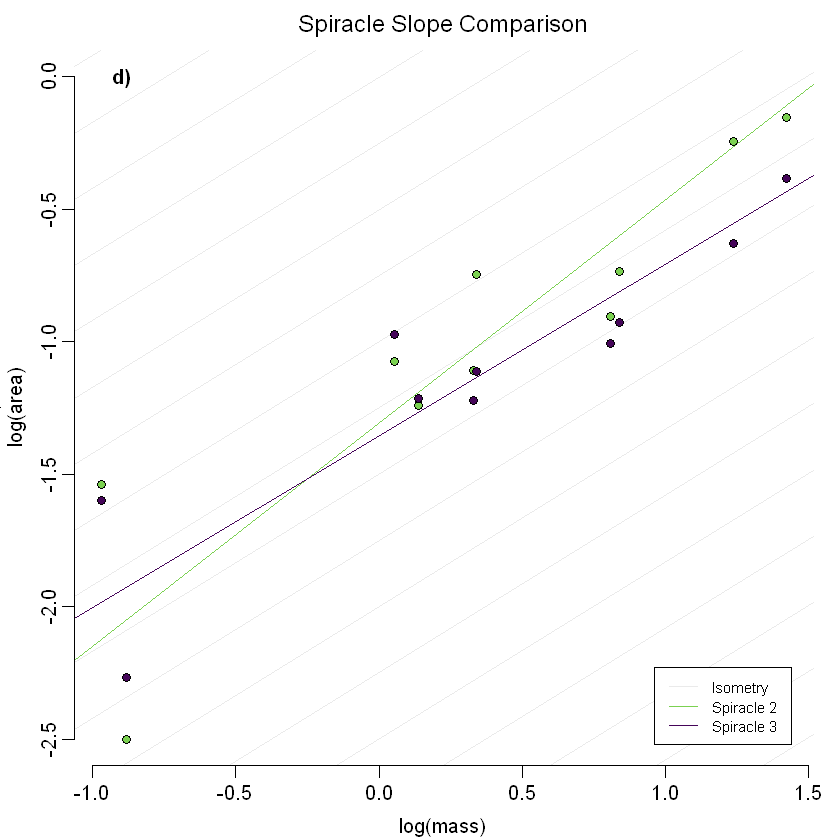

In [49]:
############### phylo comparison plot ###############
allSets <- prepData(all_sp_area)
v4 <- allSets$'4'
sumModel <- makeModels(v4,tree4,1)
model7 <- sumModel$'7'
model9 <- sumModel$'9'

par(mar = c(3,3,2,1) + 0.1)
plot(v4$mass,v4$a2,pch=, main=expression(Spiracle ~ Slope ~ Comparison),axes = FALSE,ylim = c(-2.5,0), col="white")
for(ent in seq(-4,4,0.25)) {
  abline(coef =c(ent,0.67), col=rgb(red = 0.2,green = 0.2,blue = 0.2,alpha=0.1))
}
abline(model7,col=c(viridisPal[1000-round(one$pGLS_p[4],digits=3)*1000]))
abline(model9,col=c(viridisPal[1000-round(one$pGLS_p[5],digits=3)*1000]))


points(v4$mass,v4$a2,col="black",pch=21,bg=c(viridisPal[1000-round(one$pGLS_p[4],digits=3)*1000]))
points(v4$mass,v4$a3,col="black",pch=21,bg=c(viridisPal[1000-round(one$pGLS_p[5],digits=3)*1000]))

title(ylab="log(area)", line=2, cex.lab=1)
title(xlab="log(mass)", line=2, cex.lab=1)
axis(side=2,labels = FALSE,at = seq(-2.5,0,0.5))
axis(side=2,labels = TRUE, tick = FALSE,line=-0.4,at = seq(-2.5,0,0.5))
axis(side=1,labels = FALSE)
axis(side=1,labels = TRUE, tick = FALSE,line=-0.4)

par(font=2)
legend ("topleft", legend="d)",bty = "n")
par(font=1)
legend ("bottomright",legend=c("Isometry","Spiracle 2", "Spiracle 3"),cex =0.75,lty=c(1,1,1),inset=0.03, seg.len = 2,
        col=c(rgb(red = 0.2,green = 0.2,blue = 0.2,alpha=0.1),
              viridisPal[1000-round(one$pGLS_p[4],digits=3)*1000],
              viridisPal[1000-round(one$pGLS_p[5],digits=3)*1000]),
        bg="white")

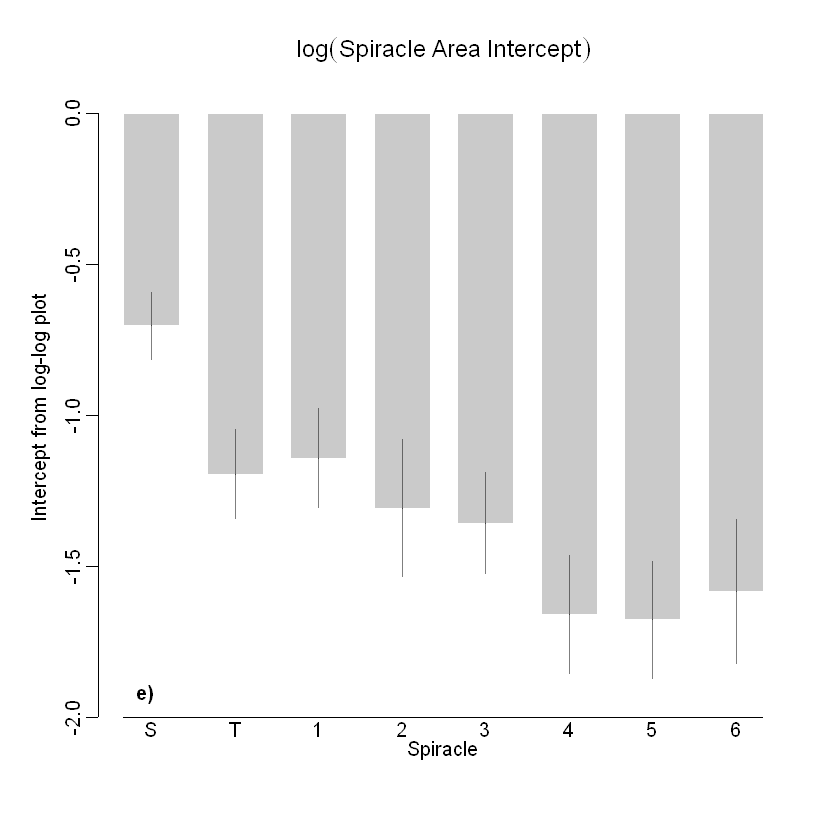

In [50]:
###############################################################################
####################### Plot of Spiracle size (panel e) #######################
###############################################################################
allSets <- prepData(all_sp_area)
v4 <- allSets$'4'
sumModel <- makeModels(v4,tree4,0.67)
model1 <- sumModel$'1'; model3 <- sumModel$'3'; model5 <- sumModel$'5';
model7 <- sumModel$'7';  model9 <- sumModel$'9'; model11 <- sumModel$'11';
model13 <- sumModel$'13'; model15 <- sumModel$'15'; model17 <- sumModel$'17';
one <- sumModel$'19'

barHeight <- c( model1$model$coef[1],model3$model$coef[1],model5$model$coef[1],model7$model$coef[1],
                model9$model$coef[1],model11$model$coef[1],model13$model$coef[1],model15$model$coef[1])
#model18$coefficients[2], model17$model$coef[2])                               
errorHeight <- c( model1$model$coef[1] - multForCI*model1$sterr[1], model3$model$coef[1] - multForCI*model3$sterr[1],model5$model$coef[1] - multForCI*model5$sterr[1],
                  model7$model$coef[1] - multForCI*model7$sterr[1],model9$model$coef[1] - multForCI*model9$sterr[1],model11$model$coef[1] - multForCI*model11$sterr[1],
                  model13$model$coef[1] - multForCI*model13$sterr[1],model15$model$coef[1] - multForCI*model15$sterr[1])


# Grouped Bar Plot
par(lwd = 1)

virPrec <- 1000

arrowCol <- rgb(red = 0,green = 0,blue = 0, alpha = 0.5)

#-log(min(one$pGLS_p),base=10)

barx <- barplot(rbind(one$pgls_intercept[1:8]), main=expression(log(Spiracle ~ Area ~ Intercept)),axes = FALSE,width = 1,space = c(0,0.5),
                col=rgb(0.7,0.7,0.7,alpha=0.7),
                beside=TRUE, ylim=c(-2,0.05),border=FALSE)#,

isoCol <- rgb(red = 0.7,green = 0.7,blue = 0.7, alpha=0.3)
lines(c(0,12),c(1,1),col=isoCol,lty=1,lend="butt")
topWidth <- 0.07
arrows(barx, barHeight, barx,errorHeight, length=topWidth, angle=90, code=0, #error bars (95% CI)
       col = arrowCol,lwd=1, lend="square")
arrows(barx, barHeight, barx,barHeight-(errorHeight-barHeight), length=topWidth, angle=90, code=0, #error bars (95% CI)
       col = arrowCol,lwd=1, lend="square")

par(font=2)
legend ("bottomleft", legend="e)",bty = "n")
par(font=1)
axis(side=2,labels = FALSE,lend="butt")
axis(side=2,labels = TRUE, tick = FALSE,line=-0.4)
axis(side=1, tck =-0.05,at = barx,line = -1, tick =FALSE,lend = "square",
     labels = c("S","T", "1","2","3","4","5","6"))
axis(side=1, tck=0, at=c(0.5,12),labels = FALSE,lend="butt")
#lines(c(0.5,12),c(0,0),lend="butt")
title(xlab="Spiracle", line=0.8, cex.lab=1)
title(ylab="Intercept from log-log plot", line=2, cex.lab=1)



pdf 
  3

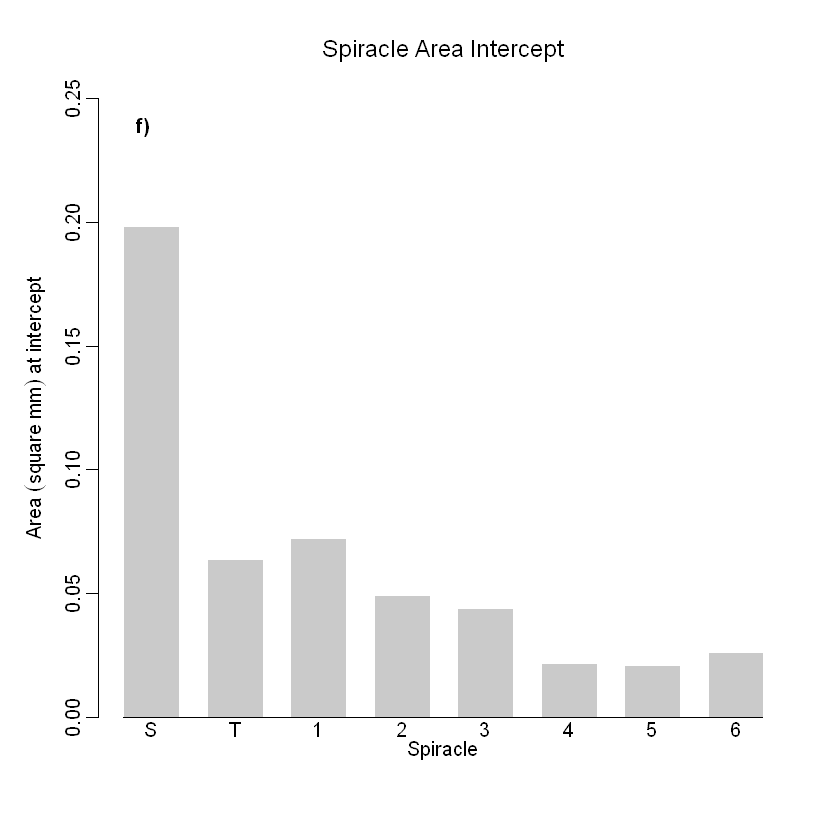

In [51]:
###### plot for intercepts #############
allSets <- prepData(all_sp_area)
v4 <- allSets$'4'
sumModel <- makeModels(v4,tree4,0.67)
model1 <- sumModel$'1'; model3 <- sumModel$'3'; model5 <- sumModel$'5';
model7 <- sumModel$'7'; model9 <- sumModel$'9'; model11 <- sumModel$'11';
model13 <- sumModel$'13'; model15 <- sumModel$'15'; model17 <- sumModel$'17';
one <- sumModel$'19'


# Grouped Bar Plot
par(lwd = 1)
barx <- barplot(rbind(10^one$pgls_intercept[1:8]), main=expression(Spiracle ~ Area ~ Intercept),axes = FALSE,width = 1,space = c(0,0.5),
                col=rgb(0.7,0.7,0.7,alpha=0.7),
                beside=TRUE, ylim=c(0,0.25),border=FALSE)#,
#legend ("topright",legend=c("lm","pGLS"),cex =0.75, fill =  c("black","black"),density = c(NA,45))
par(font=2)
legend ("topleft", legend="f)",bty = "n")
par(font=1)
axis(side=2,labels = FALSE)
axis(side=2,labels = TRUE, tick = FALSE,line=-0.4)
axis(side=1, tck =-0.05,at = (barx[1,1:8]),line = -1, tick =FALSE,
     labels = c("S","T", "1","2","3","4","5","6"))
axis(side=1, tck=0, at=c(0.5,12),labels = FALSE,lend="butt")
title(ylab=expression(Area~(square~mm)~at~intercept), line=2, cex.lab=1)
title(xlab="Spiracle", line=0.8, cex.lab=1)


o <- o + 1
dev.off()

In [27]:
#font_import()

In [94]:
par(family="Franklin Gothic Demi")
#proc royal size pdf(paste("/Users/jwagner/Desktop/plot dump r/", paste(o, ".pdf", sep = ""), sep = ""), width=7.086614173, height=4) #prepare A3 width size pdf
#pdf(paste("/c/Users/jwagne/Desktop/plot_dump/", paste(o, ".pdf", sep = ""), sep = ""), width=7.007874, height=4, family="Franklin Gothic Demi") #prepare A3 width size pdf
pdf(paste("~/Desktop/plot_dump/", paste(o, ".pdf", sep = ""), sep = ""), width=7.007874, height=4)

par(mfrow=c(2,3),mar = c(2,3,2,0) + 0.1) #split the plot area into a 2 by 3 grid 


#constants
digs <- 5 #number of digits to round the data. Needed because the pGLS does not converge for double with too many digits
multForCI <- 1.96 #multiple to get from standard error to 95% confidence interval

viridisPal <- viridis(1000)

###############################################################################
######################## Plot of Area v Mass (panel a) ########################
###############################################################################

#round data as needed for pGLS
spec <- all_sp_area$species; all_sp_area$species <- 0
r <- round(all_sp_area, digits = digs); all_sp_area$species <- spec
r$species <- spec; allSets <- prepData(r)


v4 <- allSets$'4'
sumModel <- makeModels(v4,tree4,0.67)
model1 <- sumModel$'1'; model3 <- sumModel$'3'; model5 <- sumModel$'5';
model7 <- sumModel$'7'; model9 <- sumModel$'9'; model11 <- sumModel$'11';
model13 <- sumModel$'13'; model15 <- sumModel$'15'; model17 <- sumModel$'17';
one <- sumModel$'19'

barHeight <- c( model1$model$coef[2],model3$model$coef[2],model5$model$coef[2],model7$model$coef[2],
                model9$model$coef[2],model11$model$coef[2],model13$model$coef[2],model15$model$coef[2])                      
errorHeight <- c( model1$model$coef[2] + multForCI*model1$sterr[2],model3$model$coef[2] + multForCI*model3$sterr[2],
                  model5$model$coef[2] + multForCI*model5$sterr[2],model7$model$coef[2] + multForCI*model7$sterr[2],
                  model9$model$coef[2] + multForCI*model9$sterr[2],model11$model$coef[2] + multForCI*model11$sterr[2],
                  model13$model$coef[2] + multForCI*model13$sterr[2],model15$model$coef[2] + multForCI*model15$sterr[2])

# Grouped Bar Plot

par(lwd = 1)

virPrec <- 1000

arrowCol <- rgb(red = 0,green = 0,blue = 0, alpha = 0.5)
#-log(min(one$pGLS_p),base=10)

barx <- barplot(rbind(one$pGLS_slope[1:8]), main=expression(Area ~ (mm^{2}) ~ vs ~ Mass (g)),axes = FALSE,width = 1,space = c(0,0.5),
                col=c(viridisPal[1000-round(one$pGLS_p[1:8],digits=3)*1000]),
                beside=TRUE, ylim=c(0,1.3),border=FALSE)#,
                #xlim=c(-0.1,12.5))
par(font=2)
legend ("topleft", legend="a)",bty = "n")

isoCol <- rgb(red = 0.3,green = 0.3,blue = 0.3, alpha=0.3)
lines(c(0,12),c(0.67,0.67),col=isoCol,lty=1,lend="butt")
par(font=1)
axis(side=2,labels = FALSE); axis(side=2,labels = TRUE, tick = FALSE,line=-0.4) #y axis
axis(side=1, tck =-0.05,at = barx,line = -1, tick =FALSE, #x axis
     labels = c("S","T", "1","2","3","4","5","6"))
axis(side=1, tck=0, at=c(0.5,12),labels = FALSE, lend = "butt") #x axis
title(ylab="Slope for log-log plot", line=2, cex.lab=1)
title(xlab="Spiracle", line=0.8, cex.lab=1)
topWidth <- 0.07
arrows(barx, barHeight, barx,errorHeight, length=topWidth, angle=90, code=0, #error bars (95% CI)
       col = arrowCol,lwd=1, lend="square")
arrows(barx, barHeight, barx,barHeight-(errorHeight-barHeight), length=topWidth, angle=90, code=0, #error bars (95% CI)
       col = arrowCol,lwd=1, lend="square")


# k <- 1
# note <-1
# while (k < 12) {
#   text(x=k+0.15,y=0.03,labels = round((one$'pgls_R^2')[note],digits=2),pos=3,srt=90,cex = 0.75)
#   k<- k+1.5
#   note <- note+1
# }

###############################################################################
##################### Plot of Area/Depth v Mass (panel b) #####################
###############################################################################

par(mar = c(2,3,2,0) + 0.1)

spec <- all_sp_area_d$species; all_sp_area_d$species <- 0; r <- round(all_sp_area_d, digits = digs)
all_sp_area_d$species <- spec; r$species <- spec; allSets <- prepData(r)

v4 <- allSets$'4';
v4 <- data.frame(v4)
sumModel <- makeModels(prepDat = v4,treePrep = tree4,testSlope = 0.33)

model1 <- sumModel$'1'; model3 <- sumModel$'3'; model5 <- sumModel$'5';
model7 <- sumModel$'7'; model9 <- sumModel$'9'; model11 <- sumModel$'11';
model13 <- sumModel$'13'; model15 <- sumModel$'15'; model17 <- sumModel$'17';
one <- sumModel$'19'

barHeight <- c( model1$model$coef[2],model3$model$coef[2],model5$model$coef[2],model7$model$coef[2],
                model9$model$coef[2],model11$model$coef[2],model13$model$coef[2],model15$model$coef[2])                      
errorHeight <- c( model1$model$coef[2] + multForCI*model1$sterr[2],model3$model$coef[2] + multForCI*model3$sterr[2],
                  model5$model$coef[2] + multForCI*model5$sterr[2],model7$model$coef[2] + multForCI*model7$sterr[2],
                  model9$model$coef[2] + multForCI*model9$sterr[2],model11$model$coef[2] + multForCI*model11$sterr[2],
                  model13$model$coef[2] + multForCI*model13$sterr[2],model15$model$coef[2] + multForCI*model15$sterr[2])

# Grouped Bar Plot

par(lwd = 1)

virPrec <- 1000

arrowCol <- rgb(red = 0,green = 0,blue = 0, alpha = 0.5)

#-log(min(one$pGLS_p),base=10)

barx <- barplot(rbind(one$pGLS_slope[1:8]), main=expression(Area/Depth ~ vs ~ Mass),axes = FALSE,width = 1,space = c(0,0.5),
                col=c(viridisPal[1000-round(one$pGLS_p[1:8],digits=3)*1000]),
                beside=TRUE, ylim=c(0,1),border=FALSE, xlim=c(0.5,13.5))#,
#xlim=c(-0.1,12.5))
par(font=2)
isoCol <- rgb(red = 0.3,green = 0.3,blue = 0.3, alpha=0.3)
lines(c(0,12),c(0.33,0.33),col=isoCol,lty=1,lend="butt")

topWidth <- 0.07
arrows(barx, barHeight, barx,errorHeight, length=topWidth, angle=90, code=0, #error bars (95% CI)
       col = arrowCol,lwd=1, lend="square")
arrows(barx, barHeight, barx,barHeight-(errorHeight-barHeight), length=topWidth, angle=90, code=0, #error bars (95% CI)
       col = arrowCol,lwd=1, lend="square")

legend ("topleft", legend="b)",bty = "n")
par(font=1)
axis(side=2,labels = FALSE)
axis(side=2,labels = TRUE, tick = FALSE,line=-0.4)
axis(side=1, tck =-0.05,at = barx,line = -1, tick =FALSE,
     labels = c("S","T", "1","2","3","4","5","6") )
axis(side=1, tck=0, at=c(0.5,12),labels = FALSE,lend="butt")
#title(ylab="slope log(area) vs log(mass)", line=2, cex.lab=1)
title(xlab="Spiracle", line=0.8, cex.lab=1)

yRan <- seq(0,1,0.001)
i <- 1
y <- 0
while (i < (length(yRan))) {
  segments(x0=12.5,x1=13.55,y1=yRan[i], y0=yRan[i], col = viridisPal[1000-i],lend="square", lwd = 1.1)
  i <- i+1
  y<-y+0.001
}
segments(x0=12.5,x1=13.55,y1=0.05, y0=0.05,lend="square", lwd = 0.75,col=arrowCol)

text(x=13,y=1,labels = expression(italic("p")),pos=1,cex=1,col="white")
text(x=13,y=.02,labels = expression(".05"),pos=3,cex=1,col=rgb(red = 0,green = 0,blue = 0, alpha=1),srt=0)

#segments(x0=12.5,x1=13.55,y1=0.5, y0=0.5,lend="square", lwd = 0.75,col=rgb(red = 0,green = 0,blue = 0, alpha=1))
#text(x=13,y=.48,labels = expression(".50"),pos=3,cex=1,col=rgb(red = 0,green = 0,blue = 0, alpha=1))

# k <- 1
# note <-1
# while (k < 12) {
#   text(x=k+0.15,y=0.03,labels = round((one$'pgls_R^2')[note],digits=2),pos=3,srt=90,cex = 0.75)
#   k<- k+1.5
#   note <- note+1
# }

###############################################################################
#################### Plot of Area^2/Depth v Mass (panel c) ####################
###############################################################################
par(mar = c(2,3,2,0) + 0.1)

spec <- all_sp_area_2_d$species; all_sp_area_2_d$species <- 0; r <- round(all_sp_area_2_d, digits = digs)
all_sp_area_2_d$species <- spec; r$species <- spec

allSets <- prepData(r); v4 <- allSets$'4'; sumModel <- makeModels(v4,tree4,1)

model1 <- sumModel$'1'; model3 <- sumModel$'3'; model5 <- sumModel$'5';
model7 <- sumModel$'7'; model9 <- sumModel$'9'; model11 <- sumModel$'11';
model13 <- sumModel$'13'; model15 <- sumModel$'15'; model17 <- sumModel$'17';
one <- sumModel$'19'

barHeight <- c( model1$model$coef[2],model3$model$coef[2],model5$model$coef[2],model7$model$coef[2],
                model9$model$coef[2],model11$model$coef[2],model13$model$coef[2],model15$model$coef[2])                      
errorHeight <- c( model1$model$coef[2] + multForCI*model1$sterr[2],model3$model$coef[2] + multForCI*model3$sterr[2],
                  model5$model$coef[2] + multForCI*model5$sterr[2],model7$model$coef[2] + multForCI*model7$sterr[2],
                  model9$model$coef[2] + multForCI*model9$sterr[2],model11$model$coef[2] + multForCI*model11$sterr[2],
                  model13$model$coef[2] + multForCI*model13$sterr[2],model15$model$coef[2] + multForCI*model15$sterr[2])

# Grouped Bar Plot

par(lwd = 1)

virPrec <- 1000

arrowCol <- rgb(red = 0,green = 0,blue = 0, alpha = 0.5)

#-log(min(one$pGLS_p),base=10)

barx <- barplot(rbind(one$pGLS_slope[1:8]), main=expression(Area^{2}/Depth ~ vs ~ Mass),axes = FALSE,width = 1,space = c(0,0.5),
                col=c(viridisPal[1000-round(one$pGLS_p[1:8],digits=3)*1000]),
                beside=TRUE, ylim=c(0,2.2),border=FALSE)#,

isoCol <- rgb(red = 0.3,green = 0.3,blue = 0.3, alpha=0.3)
lines(c(0,12),c(1,1),col=isoCol,lty=1,lend="butt")
topWidth <- 0.07
arrows(barx, barHeight, barx,errorHeight, length=topWidth, angle=90, code=0, #error bars (95% CI)
       col = arrowCol,lwd=1, lend="square")
arrows(barx, barHeight, barx,barHeight-(errorHeight-barHeight), length=topWidth, angle=90, code=0, #error bars (95% CI)
       col = arrowCol,lwd=1, lend="square")

par(font=2)
legend ("topleft", legend="c)",bty = "n")
par(font=1)
axis(side=2,labels = FALSE)
axis(side=2,labels = TRUE, tick = FALSE,line=-0.4)
axis(side=1, tck =-0.05,at = barx,line = -1, tick =FALSE,
     labels = c("S","T", "1","2","3","4","5","6"))
axis(side=1, tck=0, at=c(0.5,12),labels = FALSE,lend="butt")
title(xlab="Spiracle", line=0.8, cex.lab=1)


# k <- 1
# note <-1
# while (k < 12) {
#   text(x=k+0.15,y=0.05,labels = round((one$'pgls_R^2')[note],digits=2),pos=3,srt=90,cex = 0.75)
#   k<- k+1.5
#   note <- note+1
# }

############### phylo comparison plot ###############
allSets <- prepData(all_sp_area)
v4 <- allSets$'4'
sumModel <- makeModels(v4,tree4,1)
model7 <- sumModel$'7'
model9 <- sumModel$'9'

par(mar = c(3,3,2,1) + 0.1)
plot(v4$mass,v4$a2,main=expression(Spiracle ~ Slope ~ Comparison),axes = FALSE,ylim = c(-2.5,0), col="white")
for(ent in seq(-4,4,0.25)) {
  abline(coef =c(ent,0.67), col=rgb(red = 0.2,green = 0.2,blue = 0.2,alpha=0.1))
}
abline(model7,col=c(viridisPal[1000-round(one$pGLS_p[4],digits=3)*1000]))
abline(model9,col=c(viridisPal[1000-round(one$pGLS_p[5],digits=3)*1000]))


points(v4$mass,v4$a2,col="black",pch=21,bg=c(viridisPal[1000-round(one$pGLS_p[4],digits=3)*1000]))
points(v4$mass,v4$a3,col="black",pch=21,bg=c(viridisPal[1000-round(one$pGLS_p[5],digits=3)*1000]))

title(ylab="log(area)", line=2, cex.lab=1)
title(xlab="log(mass)", line=2, cex.lab=1)
axis(side=2,labels = FALSE,at = seq(-2.5,0,0.5))
axis(side=2,labels = TRUE, tick = FALSE,line=-0.4,at = seq(-2.5,0,0.5))
axis(side=1,labels = FALSE)
axis(side=1,labels = TRUE, tick = FALSE,line=-0.4)

par(font=2)
legend ("topleft", legend="d)",bty = "n")
par(font=1)
legend ("bottomright",legend=c("Isometry","Spiracle 2", "Spiracle 3"),cex =0.75,lty=c(1,1,1),inset=0.03, seg.len = 2,
        col=c(rgb(red = 0.2,green = 0.2,blue = 0.2,alpha=0.1),
              viridisPal[1000-round(one$pGLS_p[4],digits=3)*1000],
              viridisPal[1000-round(one$pGLS_p[5],digits=3)*1000]),
        bg="white")

###############################################################################
####################### Plot of Spiracle size (panel e) #######################
###############################################################################
allSets <- prepData(all_sp_area)
v4 <- allSets$'4'
sumModel <- makeModels(v4,tree4,0.67)
model1 <- sumModel$'1'; model3 <- sumModel$'3'; model5 <- sumModel$'5';
model7 <- sumModel$'7';  model9 <- sumModel$'9'; model11 <- sumModel$'11';
model13 <- sumModel$'13'; model15 <- sumModel$'15'; model17 <- sumModel$'17';
one <- sumModel$'19'

barHeight <- c( model1$model$coef[1],model3$model$coef[1],model5$model$coef[1],model7$model$coef[1],
                model9$model$coef[1],model11$model$coef[1],model13$model$coef[1],model15$model$coef[1])
#model18$coefficients[2], model17$model$coef[2])                               
errorHeight <- c( model1$model$coef[1] - multForCI*model1$sterr[1], model3$model$coef[1] - multForCI*model3$sterr[1],model5$model$coef[1] - multForCI*model5$sterr[1],
                  model7$model$coef[1] - multForCI*model7$sterr[1],model9$model$coef[1] - multForCI*model9$sterr[1],model11$model$coef[1] - multForCI*model11$sterr[1],
                  model13$model$coef[1] - multForCI*model13$sterr[1],model15$model$coef[1] - multForCI*model15$sterr[1])


# Grouped Bar Plot
par(lwd = 1)

virPrec <- 1000

arrowCol <- rgb(red = 0,green = 0,blue = 0, alpha = 0.5)

#-log(min(one$pGLS_p),base=10)

barx <- barplot(rbind(one$pgls_intercept[1:8]), main=expression(log(Spiracle ~ Area ~ Intercept)),axes = FALSE,width = 1,space = c(0,0.5),
                col=rgb(0.7,0.7,0.7,alpha=0.7),
                beside=TRUE, ylim=c(-2,0.05),border=FALSE)#,

isoCol <- rgb(red = 0.7,green = 0.7,blue = 0.7, alpha=0.3)
lines(c(0,12),c(1,1),col=isoCol,lty=1,lend="butt")
topWidth <- 0.07
arrows(barx, barHeight, barx,errorHeight, length=topWidth, angle=90, code=0, #error bars (95% CI)
       col = arrowCol,lwd=1, lend="square")
arrows(barx, barHeight, barx,barHeight-(errorHeight-barHeight), length=topWidth, angle=90, code=0, #error bars (95% CI)
       col = arrowCol,lwd=1, lend="square")

par(font=2)
legend ("bottomleft", legend="e)",bty = "n")
par(font=1)
axis(side=2,labels = FALSE,lend="butt")
axis(side=2,labels = TRUE, tick = FALSE,line=-0.4)
axis(side=1, tck =-0.05,at = barx,line = -1, tick =FALSE,lend = "square",
     labels = c("S","T", "1","2","3","4","5","6"))
axis(side=1, tck=0, at=c(0.5,12),labels = FALSE,lend="butt")
#lines(c(0.5,12),c(0,0),lend="butt")
title(xlab="Spiracle", line=0.8, cex.lab=1)
title(ylab="Intercept from log-log plot", line=2, cex.lab=1)

###### plot for intercepts #############
allSets <- prepData(all_sp_area)
v4 <- allSets$'4'
sumModel <- makeModels(v4,tree4,0.67)
model1 <- sumModel$'1'; model3 <- sumModel$'3'; model5 <- sumModel$'5';
model7 <- sumModel$'7'; model9 <- sumModel$'9'; model11 <- sumModel$'11';
model13 <- sumModel$'13'; model15 <- sumModel$'15'; model17 <- sumModel$'17';
one <- sumModel$'19'


# Grouped Bar Plot
par(lwd = 1)
barx <- barplot(rbind(10^one$pgls_intercept[1:8]), main=expression(Spiracle ~ Area ~ Intercept),axes = FALSE,width = 1,space = c(0,0.5),
                col=rgb(0.7,0.7,0.7,alpha=0.7),
                beside=TRUE, ylim=c(0,0.25),border=FALSE)#,
#legend ("topright",legend=c("lm","pGLS"),cex =0.75, fill =  c("black","black"),density = c(NA,45))
par(font=2)
legend ("topleft", legend="f)",bty = "n")
par(font=1)
axis(side=2,labels = FALSE)
axis(side=2,labels = TRUE, tick = FALSE,line=-0.4)
axis(side=1, tck =-0.05,at = (barx[1,1:8]),line = -1, tick =FALSE,
     labels = c("S","T", "1","2","3","4","5","6"))
axis(side=1, tck=0, at=c(0.5,12),labels = FALSE,lend="butt")
title(ylab=expression(Area~(square~mm)~at~intercept), line=2, cex.lab=1)
title(xlab="Spiracle", line=0.8, cex.lab=1)


o <- o + 1
dev.off()

png 
  2

In [100]:
spec <- all_sp_area_d$species; all_sp_area_d$species <- 0; r <- round(all_sp_area_d, digits = digs)
all_sp_area_d$species <- spec; r$species <- spec; allSets <- prepData(r)

v4 <- allSets$'4';
v4 <- data.frame(v4)
sumModel <- makeModels(prepDat = v4,treePrep = tree4,testSlope = 0.33)

In [101]:
summary(sumModel$'1')


Call:
pgls(formula = meso ~ mass, data = comparative_data, lambda = "ML")

Residuals:
     Min       1Q   Median       3Q      Max 
-0.04742 -0.03465 -0.01471  0.01327  0.11277 

Branch length transformations:

kappa  [Fix]  : 1.000
lambda [ ML]  : 0.111
   lower bound : 0.000, p = 0.86933
   upper bound : 1.000, p = 0.056639
   95.0% CI   : (NA, NA)
delta  [Fix]  : 1.000

Coefficients:
             Estimate Std. Error t value  Pr(>|t|)    
(Intercept) -0.163352   0.044958 -3.6334  0.006652 ** 
mass         0.461540   0.045191 10.2130 7.251e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.05569 on 8 degrees of freedom
Multiple R-squared: 0.9288,	Adjusted R-squared: 0.9199 
F-statistic: 104.3 on 1 and 8 DF,  p-value: 7.251e-06 

In [83]:
comparative_data <- comparative.data(tree4, data.frame(v4),"species")
model1<-pgls(meso~mass, comparative_data ,lambda="ML")

In [84]:
comparative_data

Comparative dataset of 10 taxa:
Phylogeny: tree4 
   10 tips, 9 internal nodes
   chr [1:10] "Cyclocephala_borealis" "Dynastes_hercules" ...
Data: data.frame(v4) 
   $ mass: num [1:10] -0.968 1.421 0.806 -0.882 0.138 ...
   $ a6  : num [1:10] -1.94 -1.19 -1.49 -1.45 -0.99 ...
   $ a5  : num [1:10] -1.89 -1.102 -1.302 -1.675 -0.937 ...
   $ a4  : num [1:10] -1.791 -1.166 -1.38 -1.74 -0.897 ...
   $ a3  : num [1:10] -0.928 -0.315 -0.888 -1.584 -0.534 ...
   $ a2  : num [1:10] -0.842 -0.0933 -0.7078 -1.8276 -0.6189 ...
   $ a1  : num [1:10] -0.8829 -0.0885 -0.6769 -1.5039 -0.307 ...
   $ meta: num [1:10] -0.909 -0.175 -0.477 -1.276 -0.677 ...
   $ meso: num [1:10] -0.603 0.5294 -0.0403 -0.6249 -0.0815 ...
   $ all : num [1:10] -0.9968 -0.0989 -0.6233 -1.2623 -0.5211 ...

In [108]:
confint(sumModel$'2')

,2.5 %,97.5 %
(Intercept),-0.2502691,-0.05218335
mass,0.3424296,0.58164653


In [106]:
sumModel$'2'


Call:
lm(formula = meso ~ mass, data = data1)

Coefficients:
(Intercept)         mass  
    -0.1512       0.4620  


In [107]:
ttestLM(sumModel$'2', 2, 0.333)

[1] 0.03765088

In [118]:
ttestpGLS(sumModel$'1', 2, 0.333)

[1] 0.01741824

In [117]:
0.05/8

[1] 0.00625